<a href="https://colab.research.google.com/github/yesjiyoung/TeamProject_DefectiveProductDetection/blob/main/defective_product__detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <반도체 제조공정 데이터 분석>  : 반도체 제조 데이터를 기반으로 불량품 분류예측하기 
- Professor
  * 한양대학교 ERICA, 로봇공학과 윤종완 교수님 
- Team member 
  * 산업경영공학과 노지영
  * 로봇공학과 여태수
- Characteristics of the dataset 
  * 타겟 변수의 클래스 불균형 : 양품 데이터와 불량 데이터의 비율 -> 97:3
  * 레코드 수의 부족 : (행)1567 * (열)592 = 2.6 : 1 비율 : 열대비 레코드의 개수가 메우 부족
  * 도메인 지식의 반영 불가 : 개방된 제조 데이터 특성 상, 피쳐이름이 모두 닫혀있음. 도메인 지식을 반영할 수 없는 구조이므로 데이터를 전처리시, 유의해야할 필요가 있음. 
- Final Evaluation
  * Team Acitivity Score : 9팀 중 1등 
  * Data Processing Creativity :  9팀 중 1등
  * AUC Score Ranking : 9팀 중 3등 









# 1.데이터 탐색

## 1.1 데이터 읽어오기

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('./uci-secom.csv')

In [ ]:
df.head()

,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,...,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,NaN,NaN,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,...,1.33,0.2829,7.1196,0.4989,53.1836,3.9139,1.7819,0.9634,0.1745,0.0375,18.1087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.0096,0.0201,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,0.0,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,...,0.85,0.0857,7.1619,0.3752,23.0713,3.9306,1.1386,1.5021,0.3718,0.1233,24.7524,267.064,0.9032,1.10,0.6219,0.4122,0.2562,0.4119,68.8489,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,0.0584,0.0484,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,-0.0033,0.9629,201.8482,0.0,9.6052,422.2894,9.6924,0.9687,192.1557,12.4782,1.4011,-5468.25,2648.25,-4515.00,-1657.25,1.3137,2.0038,7.3145,62.9333,2.6444,0.2071,3.3813,84.9105,8.6789,50.5100,64.1125,49.4900,65.1951,86.6867,...,39.33,0.6812,56.9303,17.4781,161.4081,35.3198,54.2917,1.1613,0.7288,0.2710,62.7572,268.228,0.6511,7.32,0.1630,3.5611,0.0670,2.7290,25.0363,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0.0202,0.0149,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,-0.0072,0.9569,201.9424,0.0,10.5661,420.5925,10.3387,0.9735,191.6037,12.4735,1.3888,-5476.25,2635.25,-3987.50,117.00,1.2887,1.9912,7.2748,62.8333,3.1556,0.2696,3.2728,86.3269,8.7677,50.2480,64.1511,49.7520,66.1542,86.1468,...,1.98,0.4287,9.7608,0.8311,70.9706,4.9086,2.5014,0.9778,0.2156,0.0461,22.0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,NaN,NaN,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


target변수인 'Pass/Fail'의 데이터 분포를 살표보자.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


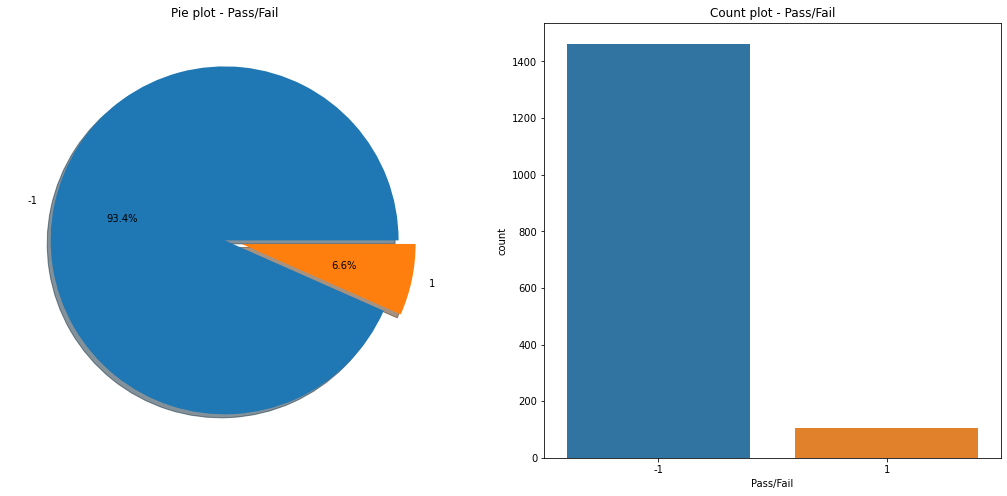

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

f, ax = plt.subplots(1, 2, figsize = (18,8))
df['Pass/Fail'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow = True)
ax[0].set_title('Pie plot - Pass/Fail')
ax[0].set_ylabel('')
sns.countplot('Pass/Fail', data=df, ax=ax[1])
ax[1].set_title('Count plot - Pass/Fail')
plt.show()

In [ ]:
df['Pass/Fail'].value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


## 1.2 기술통계량 확인

describe().trainspose()를 이용하여, 기술통계량을 편하게 확인해보자. 

In [ ]:
# transpose()함수를 이용해 기술통계량 데이터프레임 전치시키기
df_statistic = df.describe().transpose()

In [ ]:
df_statistic

,count,mean,std,min,25%,50%,75%,max
0,1561.0,3014.452896,73.621787,2743.2400,2966.260000,3011.4900,3056.6500,3356.3500
1,1560.0,2495.850231,80.407705,2158.7500,2452.247500,2499.4050,2538.8225,2846.4400
2,1553.0,2200.547318,29.513152,2060.6600,2181.044400,2201.0667,2218.0555,2315.2667
3,1553.0,1396.376627,441.691640,0.0000,1081.875800,1285.2144,1591.2235,3715.0417
4,1553.0,4.197013,56.355540,0.6815,1.017700,1.3168,1.5257,1114.5366
...,...,...,...,...,...,...,...,...
586,1566.0,0.021458,0.012358,-0.0169,0.013425,0.0205,0.0276,0.1028
587,1566.0,0.016475,0.008808,0.0032,0.010600,0.0148,0.0203,0.0799
588,1566.0,0.005283,0.002867,0.0010,0.003300,0.0046,0.0064,0.0286
589,1566.0,99.670066,93.891919,0.0000,44.368600,71.9005,114.7497,737.3048


#2.데이터전처리


## 2.1피쳐 name 변경하기

제조데이터는 그 기업의 중요 자산의 일부이므로, 변수명을 공개하지 않았음. 모두 숫자로 되어있음. <br>
피쳐이름들을 전부 실제 문자 형태로 변형, ex) 0, 1, 2 ----> 'V0','V1','V2'

In [ ]:
# 피쳐name이 숫자가 아닌 문자인 열들 df_a로 저장
df_a = df.loc[:,['Time', 'Pass/Fail']] # 'Time', 'Pass/Fail'열만 추출하기.

In [ ]:
# 피쳐name이 숫자인 모든 열을 문자열로 변경함 
# 0,1,2, ----------> V0,V1,V2
df_b = df.drop(['Time', 'Pass/Fail'], axis=1).add_prefix('V')

In [ ]:
df = pd.concat([df_a, df_b], axis=1)

In [ ]:
# 피쳐name이 숫자인 모든 열을 문자열로 변경함 
# 0,1,2, ----------> V0,V1,V2
df_b = df.drop(['Time', 'Pass/Fail'], axis=1).add_prefix('V')

In [ ]:
df.head()

,Time,Pass/Fail,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,...,V550,V551,V552,V553,V554,V555,V556,V557,V558,V559,V560,V561,V562,V563,V564,V565,V566,V567,V568,V569,V570,V571,V572,V573,V574,V575,V576,V577,V578,V579,V580,V581,V582,V583,V584,V585,V586,V587,V588,V589
0,2008-07-19 11:55,-1,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,...,12.93,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,NaN,NaN,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,2008-07-19 12:32,-1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,...,16.00,1.33,0.2829,7.1196,0.4989,53.1836,3.9139,1.7819,0.9634,0.1745,0.0375,18.1087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.0096,0.0201,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2008-07-19 13:17,1,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,0.0,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,...,16.16,0.85,0.0857,7.1619,0.3752,23.0713,3.9306,1.1386,1.5021,0.3718,0.1233,24.7524,267.064,0.9032,1.10,0.6219,0.4122,0.2562,0.4119,68.8489,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,0.0584,0.0484,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2008-07-19 14:43,-1,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,-0.0033,0.9629,201.8482,0.0,9.6052,422.2894,9.6924,0.9687,192.1557,12.4782,1.4011,-5468.25,2648.25,-4515.00,-1657.25,1.3137,2.0038,7.3145,62.9333,2.6444,0.2071,3.3813,84.9105,8.6789,50.5100,64.1125,49.4900,65.1951,...,131.68,39.33,0.6812,56.9303,17.4781,161.4081,35.3198,54.2917,1.1613,0.7288,0.2710,62.7572,268.228,0.6511,7.32,0.1630,3.5611,0.0670,2.7290,25.0363,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0.0202,0.0149,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,2008-07-19 15:22,-1,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,-0.0072,0.9569,201.9424,0.0,10.5661,420.5925,10.3387,0.9735,191.6037,12.4735,1.3888,-5476.25,2635.25,-3987.50,117.00,1.2887,1.9912,7.2748,62.8333,3.1556,0.2696,3.2728,86.3269,8.7677,50.2480,64.1511,49.7520,66.1542,...,19.63,1.98,0.4287,9.7608,0.8311,70.9706,4.9086,2.5014,0.9778,0.2156,0.0461,22.0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,NaN,NaN,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [ ]:
# transpose()함수를 이용해 기술통계량 데이터프레임 전치시키기
df_statistic = df.describe().transpose()

In [ ]:
df_statistic

,count,mean,std,min,25%,50%,75%,max
Pass/Fail,1567.0,-0.867262,0.498010,-1.0000,-1.000000,-1.00000,-1.000000,1.0000
V0,1561.0,3014.452896,73.621787,2743.2400,2966.260000,3011.49000,3056.650000,3356.3500
V1,1560.0,2495.850231,80.407705,2158.7500,2452.247500,2499.40500,2538.822500,2846.4400
V2,1553.0,2200.547318,29.513152,2060.6600,2181.044400,2201.06670,2218.055500,2315.2667
V3,1553.0,1396.376627,441.691640,0.0000,1081.875800,1285.21440,1591.223500,3715.0417
...,...,...,...,...,...,...,...,...
V585,1566.0,3.067826,3.578033,1.1975,2.306500,2.75765,3.295175,99.3032
V586,1566.0,0.021458,0.012358,-0.0169,0.013425,0.02050,0.027600,0.1028
V587,1566.0,0.016475,0.008808,0.0032,0.010600,0.01480,0.020300,0.0799
V588,1566.0,0.005283,0.002867,0.0010,0.003300,0.00460,0.006400,0.0286


##2.2 0에 가까운 분산을 가진 피쳐 제거

### 2.2.1 std==0인 변수 제거

In [ ]:
df_statistic[df_statistic['std'] == 0] # 표준편차가 0인 열들 제거하기.-> 116개의 이상한 피쳐 제거합시다.

,count,mean,std,min,25%,50%,75%,max
V5,1553.0,100.0,0.0,100.0,100.0,100.0,100.0,100.0
V13,1564.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
V42,1566.0,70.0,0.0,70.0,70.0,70.0,70.0,70.0
V49,1566.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
V52,1566.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
V534,1558.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
V535,1558.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
V536,1558.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
V537,1558.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
remove_no_meaning_cols = df_statistic[df_statistic['std'] == 0].index # index만(= 전치행렬이기때문에, 피쳐이름 ) 추출 
remove_no_meaning_cols 

Index(['V5', 'V13', 'V42', 'V49', 'V52', 'V69', 'V97', 'V141', 'V149', 'V178',
       ...
       'V529', 'V530', 'V531', 'V532', 'V533', 'V534', 'V535', 'V536', 'V537',
       'V538'],
      dtype='object', length=116)

In [ ]:
df_2 = df.drop(remove_no_meaning_cols, axis=1) # 지우자.

In [ ]:
df_2 .describe()

,Pass/Fail,V0,V1,V2,V3,V4,V6,V7,V8,V9,V10,V11,V12,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,...,V550,V551,V552,V553,V554,V555,V556,V557,V558,V559,V560,V561,V562,V563,V564,V565,V566,V567,V568,V569,V570,V571,V572,V573,V574,V575,V576,V577,V578,V579,V580,V581,V582,V583,V584,V585,V586,V587,V588,V589
count,1567.000000,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.000000,1558.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1557.000000,1567.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1543.000000,...,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1566.000000,1566.000000,1566.000000,1566.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,618.000000,618.000000,618.000000,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000
mean,-0.867262,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,101.112908,0.121822,1.462862,-0.000841,0.000146,0.964353,199.956809,9.005371,413.086035,9.907603,0.971444,190.047354,12.481034,1.405054,-5618.393610,2699.378435,-3806.299734,-298.598136,1.203845,1.938477,6.638628,69.499532,2.366197,0.184159,3.673189,85.337469,8.960279,50.582639,64.555787,49.417370,66.221274,86.836577,118.679554,67.904909,...,17.013313,1.230712,0.276688,7.703874,0.503657,57.746537,4.216905,1.623070,0.995009,0.325708,0.072443,32.284956,262.729683,0.679641,6.444985,0.145610,2.610870,0.060086,2.452417,21.117674,530.523623,2.101836,28.450165,0.345636,9.162315,0.104729,5.563747,16.642363,0.021615,0.016829,0.005396,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066
std,0.498010,73.621787,80.407705,29.513152,441.691640,56.355540,6.237214,0.008961,0.073897,0.015116,0.009302,0.012452,3.257276,2.796596,17.221095,2.403867,0.012062,2.781041,0.217965,0.016737,626.822178,295.498535,1380.162148,2902.690117,0.177600,0.189495,1.244249,3.461181,0.408694,0.032944,0.535322,2.026549,1.344456,1.182618,2.574749,1.182619,0.304141,0.446756,1.807221,24.062943,...,4.966954,1.361117,0.276231,2.192647,0.598852,35.207552,1.280008,1.870433,0.083860,0.201392,0.051578,19.026081,7.630585,0.121758,2.633583,0.081122,1.032761,0.032761,0.996644,10.213294,17.499736,0.275112,86.304681,0.248478,26.920150,0.067791,16.921369,12.485267,0.011730,0.009640,0.003116,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919
min,-1.000000,2743.240000,2158.750000,2060.660000,0.000000,0.681500,82.131100,0.000000,1.191000,-0.053400,-0.034900,0.655400,182.094000,2.249300,333.448600,4.469600,0.579400,169.177400,9.877300,1.179700,-7150.250000,0.000000,-9986.750000,-14804.500000,0.000000,0.000000,0.000000,59.400000,0.666700,0.034100,2.069800,83.182900,7.603200,49.834800,63.677400,40.228900,64.919300,84.732700,111.712800,1.434000,...,6.110000,0.120000,0.018700,2.786000,0.052000,4.826900,1.496700,0.164600,0.891900,0.069900,0.017700,7.236900,242.286000,0.304900,0.970000,0.022400,0.412200,0.009100,0.370600,3.250400,317.196400,0.980200,3.540000,0.066700,1.039500,0.023000,0.663600,4.582000,-0.016900,0.003200,0.001000,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000
25%,-1.000000,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,97.920000,0.121100,1.411200,-0.010800,-0.005600,0.958100,198.130700,7.094875,406.127400,9.567625,0.968200,188.299825,12.460000,1.396500,-5933.250000,2578.000000,-4371.750000,-1476.000000,1.094800,1.906500,5.263700,67.377800,2.088900,0.161700,3.362700,84.490500,8.580000,50.252350,64

### 2.2.2std~0에 근사한 변수 제거

In [ ]:
df_statistic_2 = df_2.describe().transpose()

In [ ]:
df_statistic_2

,count,mean,std,min,25%,50%,75%,max
Pass/Fail,1567.0,-0.867262,0.498010,-1.0000,-1.000000,-1.00000,-1.000000,1.0000
V0,1561.0,3014.452896,73.621787,2743.2400,2966.260000,3011.49000,3056.650000,3356.3500
V1,1560.0,2495.850231,80.407705,2158.7500,2452.247500,2499.40500,2538.822500,2846.4400
V2,1553.0,2200.547318,29.513152,2060.6600,2181.044400,2201.06670,2218.055500,2315.2667
V3,1553.0,1396.376627,441.691640,0.0000,1081.875800,1285.21440,1591.223500,3715.0417
...,...,...,...,...,...,...,...,...
V585,1566.0,3.067826,3.578033,1.1975,2.306500,2.75765,3.295175,99.3032
V586,1566.0,0.021458,0.012358,-0.0169,0.013425,0.02050,0.027600,0.1028
V587,1566.0,0.016475,0.008808,0.0032,0.010600,0.01480,0.020300,0.0799
V588,1566.0,0.005283,0.002867,0.0010,0.003300,0.00460,0.006400,0.0286


In [ ]:

df_statistic_2[(df_statistic_2['std'] > 0) & (df_statistic_2['std'] < 0.005)] # 분산이 0에 가까운 즉 표준편차가 0.005이하면(분산 0 ~ 0.000025) ---->  38개 열 out

,count,mean,std,min,25%,50%,75%,max
V57,1563.0,0.949215,0.004176,0.9319,0.946650,0.94930,0.952000,0.9598
V85,226.0,0.112783,0.002928,0.1053,0.110725,0.11355,0.114900,0.1184
V92,1565.0,0.000507,0.003231,-0.0126,-0.001200,0.00040,0.002000,0.0281
V93,1565.0,-0.000541,0.003010,-0.0171,-0.001600,-0.00020,0.001000,0.0133
V94,1561.0,-0.000029,0.000174,-0.0020,-0.000100,0.00000,0.000100,0.0011
V95,1561.0,0.000060,0.000104,-0.0009,0.000000,0.00000,0.000100,0.0009
V100,1561.0,-0.000021,0.000356,-0.0030,-0.000200,0.00000,0.000200,0.0023
V101,1561.0,-0.000007,0.000221,-0.0024,-0.000100,0.00000,0.000100,0.0017
V103,1565.0,-0.009789,0.003065,-0.0329,-0.011800,-0.01010,-0.008200,0.0203
V104,1565.0,-0.000015,0.000851,-0.0119,-0.000400,0.00000,0.000400,0.0071


In [ ]:

remove_no_meaning_cols_2 = df_statistic_2[(df_statistic_2['std'] > 0) & (df_statistic_2['std'] < 0.005)].index
df_2 = df_2.drop(remove_no_meaning_cols_2, axis=1) # 열 38개 제거

In [ ]:
df_2

,Time,Pass/Fail,V0,V1,V2,V3,V4,V6,V7,V8,V9,V10,V11,V12,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,...,V546,V547,V548,V549,V550,V551,V552,V553,V554,V555,V556,V557,V558,V559,V560,V561,V562,V563,V564,V565,V566,V567,V568,V569,V570,V571,V572,V573,V574,V575,V576,V577,V578,V579,V581,V583,V585,V586,V587,V589
0,2008-07-19 11:55,-1,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,...,1.0616,395.570,75.752,0.4234,12.93,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,NaN,NaN,NaN,0.0118,2.3630,NaN,NaN,NaN
1,2008-07-19 12:32,-1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,118.1188,...,1.3526,408.798,74.640,0.7193,16.00,1.33,0.2829,7.1196,0.4989,53.1836,3.9139,1.7819,0.9634,0.1745,0.0375,18.1087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.0096,0.0201,208.2045,0.0223,4.4447,0.0096,0.0201,208.2045
2,2008-07-19 13:17,1,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,118.6128,...,0.7942,411.136,74.654,0.1832,16.16,0.85,0.0857,7.1619,0.3752,23.0713,3.9306,1.1386,1.5021,0.3718,0.1233,24.7524,267.064,0.9032,1.10,0.6219,0.4122,0.2562,0.4119,68.8489,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,0.0584,0.0484,82.8602,0.0157,3.1745,0.0584,0.0484,82.8602
3,2008-07-19 14:43,-1,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,0.9629,201.8482,9.6052,422.2894,9.6924,0.9687,192.1557,12.4782,1.4011,-5468.25,2648.25,-4515.00,-1657.25,1.3137,2.0038,7.3145,62.9333,2.6444,0.2071,3.3813,84.9105,8.6789,50.5100,64.1125,49.4900,65.1951,86.6867,117.0442,...,1.1650,372.822,72.442,1.8804,131.68,39.33,0.6812,56.9303,17.4781,161.4081,35.3198,54.2917,1.1613,0.7288,0.2710,62.7572,268.228,0.6511,7.32,0.1630,3.5611,0.0670,2.7290,25.0363,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0.0202,0.0149,73.8432,0.0103,2.0544,0.0202,0.0149,73.8432
4,2008-07-19 15:22,-1,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,0.9569,201.9424,10.5661,420.5925,10.3387,0.9735,191.6037,12.4735,1.3888,-5476.25,2635.25,-3987.50,117.00,1.2887,1.9912,7.2748,62.8333,3.1556,0.2696,3.2728,86.3269,8.7677,50.2480,64.1511,49.7520,66.1542,86.1468,121.4364,...,1.4636,399.914,79.156,1.0388,19.63,1.98,0.4287,9.7608,0.8311,70.9706,4.9086,2.5014,0.9778,0.2156,0.0461,22.0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,NaN,NaN,NaN,0.4766,99.3032,0.0202,0.0149,73.8432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13,-1,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.3424,-0.0045,-0.0057,0.9579,203.9867,11.7692,419.3404,10.2397,0.9693,193.7470,12.5373,1.4072,-5418.75,2608.00,-6228.25,356.00,1.2817,1.9540,7.0793,71.1444,2.2222,0.1753,3.4680,83.8405,8.7164,50.2482,64.3573,49.7518,66.2013,86.3672,120.5156,...,1.2960,401.774,77.166,1.1040,1

## 2.3다중공선성 문제 확인 및 상관성 분석을 통해 피쳐를 선별적으로 제거

In [ ]:
corr_df = df_2.corr()

corr_df

,Pass/Fail,V0,V1,V2,V3,V4,V6,V7,V8,V9,V10,V11,V12,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,...,V546,V547,V548,V549,V550,V551,V552,V553,V554,V555,V556,V557,V558,V559,V560,V561,V562,V563,V564,V565,V566,V567,V568,V569,V570,V571,V572,V573,V574,V575,V576,V577,V578,V579,V581,V583,V585,V586,V587,V589
Pass/Fail,1.000000,-0.025144,-0.002615,-0.000957,-0.024631,-0.013760,0.016244,0.012993,0.028018,-0.031192,0.033641,-0.032622,-0.005969,-0.068980,-0.002885,0.002356,-0.009698,-0.008853,0.030657,0.023253,0.108488,-0.073713,0.012932,-0.018380,-0.036545,-0.081515,-0.029339,-0.107252,0.017193,0.037381,-0.049232,0.052133,0.080947,0.002536,-0.012281,-0.002536,0.041328,0.052602,-0.002127,-0.051792,...,-0.013640,0.048205,0.009405,0.004319,0.053891,0.064071,0.005066,0.053322,0.064081,0.024549,0.050430,0.064215,0.023154,0.024100,0.020053,0.026177,-0.048967,-0.017257,0.015542,0.045848,0.002935,0.045905,0.018901,0.052125,-0.001656,-0.019353,-0.032233,-0.051873,-0.034713,-0.052731,-0.028488,-0.049633,0.013944,0.040198,-0.020748,0.005981,0.005034,0.004157,0.035392,-0.002654
V0,-0.025144,1.000000,-0.145071,0.004775,-0.007655,-0.011047,0.002281,0.031510,-0.052731,0.009052,0.006515,0.043577,0.010386,-0.007089,0.030712,-0.005753,0.012637,0.017732,-0.009056,0.025855,-0.011095,0.032250,-0.046777,-0.014996,0.108831,0.093141,0.107867,0.054726,-0.030968,-0.039721,-0.056917,-0.004651,-0.034064,-0.017684,-0.004547,0.017684,-0.035680,-0.042325,-0.034963,-0.009255,...,0.028643,0.029126,-0.095091,0.045060,-0.080397,-0.016389,0.043536,-0.097446,-0.018590,0.032672,-0.078370,-0.012831,0.029295,0.041462,0.040574,0.037971,-0.010202,-0.008485,0.062718,0.043835,0.060983,0.044466,0.063916,0.052937,-0.018956,-0.023184,0.013679,-0.002068,0.015208,0.006989,0.013230,0.008603,-0.033438,-0.070715,-0.028380,0.023469,0.023605,0.018472,-0.025909,0.004177
V1,-0.002615,-0.145071,1.000000,0.005802,-0.007603,-0.001641,-0.025702,-0.012084,0.031321,0.024015,0.009662,-0.026941,0.034120,-0.037842,-0.087535,-0.001882,-0.009839,0.043082,-0.003228,0.032798,0.058194,-0.052703,-0.016082,-0.060557,0.004642,-0.024070,0.003654,-0.022929,0.001674,0.052150,-0.051473,-0.044646,-0.021574,-0.060587,-0.065780,0.060588,-0.008573,0.008537,-0.055916,0.027218,...,0.028672,0.038131,0.077345,-0.018018,0.029761,0.005062,-0.017155,0.041873,0.008870,-0.026981,0.026624,0.002110,-0.039599,-0.027722,-0.019215,-0.025514,0.042499,0.022497,-0.015725,-0.023474,-0.011203,-0.023128,-0.019523,-0.029128,-0.009000,-0.037974,0.001753,-0.011474,0.001303,-0.008860,0.002570,-0.010149,-0.018035,0.075029,0.083463,0.002905,0.002273,-0.009417,0.017290,0.044834
V2,-0.000957,0.004775,0.005802,1.000000,0.298935,0.095891,-0.136225,-0.273970,0.023609,0.016291,0.069989,0.036389,0.018356,0.006507,0.006126,-0.000788,-0.004921,0.021933,-0.029347,0.015507,0.044606,-0.029901,0.009320,-0.021233,-0.026546,-0.027613,-0.025827,-0.061986,0.050220,0.062641,-0.007433,-0.023376,-0.042976,0.004004,0.015174,-0.004005,-0.003217,-0.008937,-0.004726,-0.015107,...,-0.040612,0.031472,-0.030214,-0.014411,0.019035,0.016211,-0.013097,0.015439,0.013306,-0.004940,0.016972,0.018293,0.029946,0.028729,0.026991,0.026108,0.014599,-0.022503,0.055306,0.048558,0.055462,0.043296,0.055366,0.070879,-0.037073,-0.015716,-0.000518,-0.030692,0.001342,-0.035068,0.002593,-0.028713,-0.030516,-0.025474,-0.010759,0.015711,0.015765,-0.025548,-0.029479,-0.033226
V3,-0.024631,-0.007655,-0.007603,0.298935,1.000000,-0.058483,-0.685835,0.138290,-0.103656,0.068998,0.050137,0.040687,-0.028384,-0.020006,-0.013236,-0.004614,0.042889,-0.028810,0.040405,0.038042,0.021166,-0.033202,-0.008007,-0.049772,0.079853,0.036201,0.085477,0.097231,-0.013400,0.001726,-0.109033,-0.020663,-0.041257,-0.006229,0.055826,0.006229,-0.000777,-0.053991,0.021367,-0.006555,...,-0.080622,-0.054011,-0.070614,-0.057617,-0.022785,-0.022228,-0.055515,-0.030192,-0.025807,-0.064585,-0.021121,-0.018825,0.082772,0.026063,0.013800,0.015054,0.045370,-0.023933,0.0

절댓값 0.8 이상인 피쳐 쌍에는 그 값이 표현됨. ex) 'V585' & 'V583' = 0.99989

In [ ]:
cor_df_nan = corr_df[corr_df > abs(0.8)]

cor_df_nan

,Pass/Fail,V0,V1,V2,V3,V4,V6,V7,V8,V9,V10,V11,V12,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,...,V546,V547,V548,V549,V550,V551,V552,V553,V554,V555,V556,V557,V558,V559,V560,V561,V562,V563,V564,V565,V566,V567,V568,V569,V570,V571,V572,V573,V574,V575,V576,V577,V578,V579,V581,V583,V585,V586,V587,V589
Pass/Fail,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V2,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V3,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,0.99989,NaN,NaN,NaN
V585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.99989,1.00000,NaN,NaN,NaN
V586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN
V587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN


In [ ]:
col_names = list(cor_df_nan)
row_names = list(cor_df_nan.index)

상관계수 값이 절댓값 0.8 이상 1 이하인 것들 추출

In [ ]:
result = []
for i in range(0, len(col_names)):
  for j in range(0,len(row_names)):
    value = []
    if ( (cor_df_nan[col_names[i]][row_names[j]] > 0.8) & (cor_df_nan[col_names[i]][row_names[j]] < 1 )) :
      value.append(col_names[i])
      value.append(row_names[j])
      value.append(cor_df_nan[col_names[i]][row_names[j]])
      result.append(value)

In [ ]:
result

[['V4', 'V140', 0.9999751247610721],
 ['V4', 'V275', 0.9999755698304483],
 ['V4', 'V413', 0.9384157839693658],
 ['V16', 'V147', 0.8856944709713125],
 ['V16', 'V148', 0.9702942514604946],
 ['V16', 'V152', 0.9775661160561941],
 ['V16', 'V154', 0.8736683117857265],
 ['V16', 'V282', 0.8847738822048018],
 ['V16', 'V283', 0.9713242452185892],
 ['V16', 'V287', 0.9776476351736386],
 ['V16', 'V289', 0.87713123008573],
 ['V16', 'V420', 0.8963185589448729],
 ['V16', 'V421', 0.9630499264468172],
 ['V16', 'V425', 0.9367395458941142],
 ['V16', 'V427', 0.8934125804427407],
 ['V25', 'V26', 0.8231111215973258],
 ['V25', 'V27', 0.9803753833240901],
 ['V26', 'V25', 0.8231111215973258],
 ['V27', 'V25', 0.9803753833240901],
 ['V29', 'V30', 0.8581473047890597],
 ['V30', 'V29', 0.8581473047890597],
 ['V43', 'V60', 0.9003091248930098],
 ['V45', 'V46', 0.8090426063697476],
 ['V46', 'V45', 0.8090426063697476],
 ['V46', 'V50', 0.9044818259166801],
 ['V46', 'V66', 0.8243807616997202],
 ['V50', 'V46', 0.9044818259

In [ ]:
result2 = pd.DataFrame(result)
result2
result3 = result2.drop_duplicates([2], keep="first")
result3

,0,1,2
0,V4,V140,0.999975
1,V4,V275,0.999976
2,V4,V413,0.938416
3,V16,V147,0.885694
4,V16,V148,0.970294
...,...,...,...
1184,V574,V576,0.991738
1185,V574,V577,0.851784
1187,V575,V577,0.928311
1190,V576,V577,0.859278


In [ ]:
a = result3[0].value_counts()
a0=pd.DataFrame(a)
b = result3[1].value_counts()
b0=pd.DataFrame(b)
c = pd.concat([a0,b0], ignore_index=True, axis=1)
c

,0,1
V196,17.0,1.0
V67,16.0,NaN
V199,15.0,3.0
V197,14.0,2.0
V16,12.0,NaN
...,...,...
V281,NaN,1.0
V349,NaN,1.0
V285,NaN,1.0
V54,NaN,1.0


In [ ]:
c = c.fillna(0)

c['sum'] = c[0]+c[1]

c

,0,1,sum
V196,17.0,1.0,18.0
V67,16.0,0.0,16.0
V199,15.0,3.0,18.0
V197,14.0,2.0,16.0
V16,12.0,0.0,12.0
...,...,...,...
V281,0.0,1.0,1.0
V349,0.0,1.0,1.0
V285,0.0,1.0,1.0
V54,0.0,1.0,1.0


matrix 형태이기 때문에 중복된 것들을 고려한 상태에서, 다른 변수들과 가장 큰 그물망을 형성하고 있는 피쳐 상위 30개를 뽑음

In [ ]:
c = c.sort_values(by=['sum'], axis=0, ascending=False)
c

,0,1,sum
V207,12.0,7.0,19.0
V479,0.0,19.0,19.0
V196,17.0,1.0,18.0
V199,15.0,3.0,18.0
V67,16.0,0.0,16.0
...,...,...,...
V45,1.0,0.0,1.0
V162,1.0,0.0,1.0
V216,1.0,0.0,1.0
V280,0.0,1.0,1.0


In [ ]:
pick = []
for i in range(0, 30):
  pick.append(list(c.index)[i])

In [ ]:
pick

['V207',
 'V479',
 'V196',
 'V199',
 'V67',
 'V197',
 'V343',
 'V205',
 'V341',
 'V477',
 'V336',
 'V469',
 'V332',
 'V333',
 'V335',
 'V340',
 'V204',
 'V287',
 'V282',
 'V431',
 'V420',
 'V427',
 'V283',
 'V425',
 'V430',
 'V154',
 'V152',
 'V164',
 'V202',
 'V421']

In [ ]:
df_2 = df_2.drop(pick, axis=1) #30개열 추가 제거! 

In [ ]:
df_2.head()

,Time,Pass/Fail,V0,V1,V2,V3,V4,V6,V7,V8,V9,V10,V11,V12,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,...,V546,V547,V548,V549,V550,V551,V552,V553,V554,V555,V556,V557,V558,V559,V560,V561,V562,V563,V564,V565,V566,V567,V568,V569,V570,V571,V572,V573,V574,V575,V576,V577,V578,V579,V581,V583,V585,V586,V587,V589
0,2008-07-19 11:55,-1,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,...,1.0616,395.570,75.752,0.4234,12.93,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,NaN,NaN,NaN,0.0118,2.3630,NaN,NaN,NaN
1,2008-07-19 12:32,-1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,118.1188,...,1.3526,408.798,74.640,0.7193,16.00,1.33,0.2829,7.1196,0.4989,53.1836,3.9139,1.7819,0.9634,0.1745,0.0375,18.1087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.0096,0.0201,208.2045,0.0223,4.4447,0.0096,0.0201,208.2045
2,2008-07-19 13:17,1,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,118.6128,...,0.7942,411.136,74.654,0.1832,16.16,0.85,0.0857,7.1619,0.3752,23.0713,3.9306,1.1386,1.5021,0.3718,0.1233,24.7524,267.064,0.9032,1.10,0.6219,0.4122,0.2562,0.4119,68.8489,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,0.0584,0.0484,82.8602,0.0157,3.1745,0.0584,0.0484,82.8602
3,2008-07-19 14:43,-1,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,0.9629,201.8482,9.6052,422.2894,9.6924,0.9687,192.1557,12.4782,1.4011,-5468.25,2648.25,-4515.00,-1657.25,1.3137,2.0038,7.3145,62.9333,2.6444,0.2071,3.3813,84.9105,8.6789,50.5100,64.1125,49.4900,65.1951,86.6867,117.0442,...,1.1650,372.822,72.442,1.8804,131.68,39.33,0.6812,56.9303,17.4781,161.4081,35.3198,54.2917,1.1613,0.7288,0.2710,62.7572,268.228,0.6511,7.32,0.1630,3.5611,0.0670,2.7290,25.0363,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0.0202,0.0149,73.8432,0.0103,2.0544,0.0202,0.0149,73.8432
4,2008-07-19 15:22,-1,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,0.9569,201.9424,10.5661,420.5925,10.3387,0.9735,191.6037,12.4735,1.3888,-5476.25,2635.25,-3987.50,117.00,1.2887,1.9912,7.2748,62.8333,3.1556,0.2696,3.2728,86.3269,8.7677,50.2480,64.1511,49.7520,66.1542,86.1468,121.4364,...,1.4636,399.914,79.156,1.0388,19.63,1.98,0.4287,9.7608,0.8311,70.9706,4.9086,2.5014,0.9778,0.2156,0.0461,22.0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,NaN,NaN,NaN,0.4766,99.3032,0.0202,0.0149,73.8432


In [ ]:
df_2.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 408 entries, Time to V589
dtypes: float64(406), int64(1), object(1)
memory usage: 4.9+ MB


In [ ]:
df_2.to_csv('df_2.csv', index=False)

In [ ]:
df_2

,Time,Pass/Fail,V0,V1,V2,V3,V4,V6,V7,V8,V9,V10,V11,V12,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,...,V546,V547,V548,V549,V550,V551,V552,V553,V554,V555,V556,V557,V558,V559,V560,V561,V562,V563,V564,V565,V566,V567,V568,V569,V570,V571,V572,V573,V574,V575,V576,V577,V578,V579,V581,V583,V585,V586,V587,V589
0,2008-07-19 11:55,-1,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,...,1.0616,395.570,75.752,0.4234,12.93,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,NaN,NaN,NaN,0.0118,2.3630,NaN,NaN,NaN
1,2008-07-19 12:32,-1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,118.1188,...,1.3526,408.798,74.640,0.7193,16.00,1.33,0.2829,7.1196,0.4989,53.1836,3.9139,1.7819,0.9634,0.1745,0.0375,18.1087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.0096,0.0201,208.2045,0.0223,4.4447,0.0096,0.0201,208.2045
2,2008-07-19 13:17,1,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,118.6128,...,0.7942,411.136,74.654,0.1832,16.16,0.85,0.0857,7.1619,0.3752,23.0713,3.9306,1.1386,1.5021,0.3718,0.1233,24.7524,267.064,0.9032,1.10,0.6219,0.4122,0.2562,0.4119,68.8489,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,0.0584,0.0484,82.8602,0.0157,3.1745,0.0584,0.0484,82.8602
3,2008-07-19 14:43,-1,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,0.9629,201.8482,9.6052,422.2894,9.6924,0.9687,192.1557,12.4782,1.4011,-5468.25,2648.25,-4515.00,-1657.25,1.3137,2.0038,7.3145,62.9333,2.6444,0.2071,3.3813,84.9105,8.6789,50.5100,64.1125,49.4900,65.1951,86.6867,117.0442,...,1.1650,372.822,72.442,1.8804,131.68,39.33,0.6812,56.9303,17.4781,161.4081,35.3198,54.2917,1.1613,0.7288,0.2710,62.7572,268.228,0.6511,7.32,0.1630,3.5611,0.0670,2.7290,25.0363,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0.0202,0.0149,73.8432,0.0103,2.0544,0.0202,0.0149,73.8432
4,2008-07-19 15:22,-1,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,0.9569,201.9424,10.5661,420.5925,10.3387,0.9735,191.6037,12.4735,1.3888,-5476.25,2635.25,-3987.50,117.00,1.2887,1.9912,7.2748,62.8333,3.1556,0.2696,3.2728,86.3269,8.7677,50.2480,64.1511,49.7520,66.1542,86.1468,121.4364,...,1.4636,399.914,79.156,1.0388,19.63,1.98,0.4287,9.7608,0.8311,70.9706,4.9086,2.5014,0.9778,0.2156,0.0461,22.0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,NaN,NaN,NaN,0.4766,99.3032,0.0202,0.0149,73.8432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13,-1,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.3424,-0.0045,-0.0057,0.9579,203.9867,11.7692,419.3404,10.2397,0.9693,193.7470,12.5373,1.4072,-5418.75,2608.00,-6228.25,356.00,1.2817,1.9540,7.0793,71.1444,2.2222,0.1753,3.4680,83.8405,8.7164,50.2482,64.3573,49.7518,66.2013,86.3672,120.5156,...,1.2960,401.774,77.166,1.1040,1

##2.4 Null값 처리하기

###2.4.150% 이상 Null값을 가진 열 제거

In [ ]:
# Null 값이 50%인 열 지우기 위해, null_df 데이터 프레임 생성
a = df_2.isnull().sum()
null_df = pd.DataFrame(a)
null_df['null_percent'] = (null_df[0] / 1567) * 100
null_df

,0,null_percent
Time,0,0.000000
Pass/Fail,0,0.000000
V0,6,0.382897
V1,7,0.446713
V2,14,0.893427
...,...,...
V583,1,0.063816
V585,1,0.063816
V586,1,0.063816
V587,1,0.063816


In [ ]:
remove_under_50null = null_df[null_df['null_percent']>50].index

In [ ]:
remove_under_50null

Index(['V72', 'V73', 'V109', 'V110', 'V111', 'V157', 'V158', 'V244', 'V245',
       'V246', 'V292', 'V293', 'V345', 'V346', 'V382', 'V383', 'V384', 'V492',
       'V516', 'V517', 'V518', 'V578', 'V579', 'V581'],
      dtype='object')

In [ ]:
df_3 = df_2.drop(remove_under_50null, axis=1) ########df_3 : 50% 이상 Null값을 가진 열 제거된 데이터 프레임.

In [ ]:
df_3.to_csv('df_3.csv', index=False)

In [ ]:
df_3.isnull().sum()

Time          0
Pass/Fail     0
V0            6
V1            7
V2           14
             ..
V583          1
V585          1
V586          1
V587          1
V589          1
Length: 384, dtype: int64

In [ ]:
df_3 = df_3.drop(['Time'], axis=1) # 우선은 time열 제거하고 진행해보자.

In [ ]:
df_3

,Pass/Fail,V0,V1,V2,V3,V4,V6,V7,V8,V9,V10,V11,V12,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,...,V540,V541,V545,V546,V547,V548,V549,V550,V551,V552,V553,V554,V555,V556,V557,V558,V559,V560,V561,V562,V563,V564,V565,V566,V567,V568,V569,V570,V571,V572,V573,V574,V575,V576,V577,V583,V585,V586,V587,V589
0,-1,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,...,4.0825,11.5074,7.1160,1.0616,395.570,75.752,0.4234,12.93,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,0.0118,2.3630,NaN,NaN,NaN
1,-1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,118.1188,78.25,...,2.9799,9.5796,7.1160,1.3526,408.798,74.640,0.7193,16.00,1.33,0.2829,7.1196,0.4989,53.1836,3.9139,1.7819,0.9634,0.1745,0.0375,18.1087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.0223,4.4447,0.0096,0.0201,208.2045
2,1,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,118.6128,14.37,...,2.9667,9.3046,7.1160,0.7942,411.136,74.654,0.1832,16.16,0.85,0.0857,7.1619,0.3752,23.0713,3.9306,1.1386,1.5021,0.3718,0.1233,24.7524,267.064,0.9032,1.10,0.6219,0.4122,0.2562,0.4119,68.8489,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,0.0157,3.1745,0.0584,0.0484,82.8602
3,-1,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,0.9629,201.8482,9.6052,422.2894,9.6924,0.9687,192.1557,12.4782,1.4011,-5468.25,2648.25,-4515.00,-1657.25,1.3137,2.0038,7.3145,62.9333,2.6444,0.2071,3.3813,84.9105,8.6789,50.5100,64.1125,49.4900,65.1951,86.6867,117.0442,76.90,...,3.2465,7.7754,7.1160,1.1650,372.822,72.442,1.8804,131.68,39.33,0.6812,56.9303,17.4781,161.4081,35.3198,54.2917,1.1613,0.7288,0.2710,62.7572,268.228,0.6511,7.32,0.1630,3.5611,0.0670,2.7290,25.0363,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0.0103,2.0544,0.0202,0.0149,73.8432
4,-1,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,0.9569,201.9424,10.5661,420.5925,10.3387,0.9735,191.6037,12.4735,1.3888,-5476.25,2635.25,-3987.50,117.00,1.2887,1.9912,7.2748,62.8333,3.1556,0.2696,3.2728,86.3269,8.7677,50.2480,64.1511,49.7520,66.1542,86.1468,121.4364,76.39,...,1.9999,9.4805,7.1160,1.4636,399.914,79.156,1.0388,19.63,1.98,0.4287,9.7608,0.8311,70.9706,4.9086,2.5014,0.9778,0.2156,0.0461,22.0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,0.4766,99.3032,0.0202,0.0149,73.8432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,-1,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.3424,-0.0045,-0.0057,0.9579,203.9867,11.7692,419.3404,10.2397,0.9693,193.7470,12.5373,1.4072,-5418.75,2608.00,-6228.25,356.00,1.2817,1.9540,7.0793,71.1444,2.2222,0.1753,3.4680,83.8405,8.7164,50.2482,64.3573,49.7518,66.2013,86.3672,120.5156,81.21,...,1.4237,8.0758,8.8096,1.2960,401.774,77.166,1.1040,16.90,0.80,0.4754,8.5138,0.3141,

###2.4.2나머지 null값을 다중대치법을 사용하여 예측값으로 채움

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


IterativeImputer(verbose = 1).fit_transform(df_3)
df_4 = pd.DataFrame(IterativeImputer(verbose=False).fit_transform(df_3))

[IterativeImputer] Completing matrix with shape (1567, 383)
[IterativeImputer] Change: 1043.9422784448172, scaled tolerance: 37.943 
[IterativeImputer] Change: 153.9011052071095, scaled tolerance: 37.943 
[IterativeImputer] Change: 208.87887483808566, scaled tolerance: 37.943 
[IterativeImputer] Change: 276.6952396105098, scaled tolerance: 37.943 
[IterativeImputer] Change: 275.0114189960922, scaled tolerance: 37.943 
[IterativeImputer] Change: 247.27738117596903, scaled tolerance: 37.943 
[IterativeImputer] Change: 213.57999544843847, scaled tolerance: 37.943 
[IterativeImputer] Change: 181.25426169360207, scaled tolerance: 37.943 
[IterativeImputer] Change: 152.61139452941651, scaled tolerance: 37.943 
[IterativeImputer] Change: 128.05241596878085, scaled tolerance: 37.943 


/usr/local/lib/python3.6/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [ ]:
df_4 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382
0,-1.0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.500500,0.016200,-0.003400,0.945500,202.439600,7.955800,414.871000,0.968000,192.396300,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,...,4.082500,11.507400,7.1160,1.0616,395.570,75.752,0.4234,12.93,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,262.145534,0.703870,6.560815,0.150094,2.592102,0.063999,2.485771,21.452145,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,0.0118,2.3630,0.020209,0.013995,101.106301
1,-1.0,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.496600,-0.000500,-0.014800,0.962700,200.547000,10.154800,414.734700,0.970100,191.287200,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,118.1188,78.25,2.773,...,2.979900,9.579600,7.1160,1.3526,408.798,74.640,0.7193,16.00,1.33,0.2829,7.1196,0.4989,53.1836,3.9139,1.7819,0.9634,0.1745,0.0375,18.1087,263.622807,0.683978,6.443021,0.156108,2.562853,0.067459,2.457876,21.949865,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.0223,4.4447,0.009600,0.020100,208.204500
2,1.0,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.443600,0.004100,0.001300,0.961500,202.017900,9.515700,416.707500,0.967400,192.703500,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,118.6128,14.37,5.434,...,2.966700,9.304600,7.1160,0.7942,411.136,74.654,0.1832,16.16,0.85,0.0857,7.1619,0.3752,23.0713,3.9306,1.1386,1.5021,0.3718,0.1233,24.7524,267.064000,0.903200,1.100000,0.621900,0.412200,0.256200,0.411900,68.848900,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,0.0157,3.1745,0.058400,0.048400,82.860200
3,-1.0,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.488200,-0.012400,-0.003300,0.962900,201.848200,9.605200,422.289400,0.968700,192.155700,12.4782,1.4011,-5468.25,2648.25,-4515.00,-1657.25,1.3137,2.0038,7.3145,62.9333,2.6444,0.2071,3.3813,84.9105,8.6789,50.5100,64.1125,49.4900,65.1951,86.6867,117.0442,76.90,1.279,...,3.246500,7.775400,7.1160,1.1650,372.822,72.442,1.8804,131.68,39.33,0.6812,56.9303,17.4781,161.4081,35.3198,54.2917,1.1613,0.7288,0.2710,62.7572,268.228000,0.651100,7.320000,0.163000,3.561100,0.067000,2.729000,25.036300,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0.0103,2.0544,0.020200,0.014900,73.843200
4,-1.0,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.503100,-0.003100,-0.007200,0.956900,201.942400,10.566100,420.592500,0.973500,191.603700,12.4735,1.3888,-5476.25,2635.25,-3987.50,117.00,1.2887,1.9912,7.2748,62.8333,3.1556,0.2696,3.2728,86.3269,8.7677,50.2480,64.1511,49.7520,66.1542,86.1468,121.4364,76.39,2.209,...,1.999900,9.480500,7.1160,1.4636,399.914,79.156,1.0388,19.63,1.98,0.4287,9.7608,0.8311,70.9706,4.9086,2.5014,0.9778,0.2156,0.0461,22.0500,262.663018,0.567060,6.195095,0.122621,2.468404,0.057464,2.323505,20.835182,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,0.4766,99.3032,0.020200,0.014900,73.843200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,-1.0,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.342400,-0.004500,-0.005700,0.957900,203.986700,11.769200,419.340400,0.969300,193.747000,12.5373,

In [ ]:
df_4.columns = df_3.columns

In [ ]:
df_4.to_csv('df_4.csv', index=False) # df_4(1)(1)(1)로 저장될듯. 최종본.

##2.5 Oultlier 확인

class 가 'Pass'인 데이터와 'Fail'인 데이터들을 분리 

In [ ]:
# Fail_df : df_4['Pass/Fail'] == 1 의 행만 뽑은 데이터
Fail_df = df_4[df_4['Pass/Fail'] == 1]
# Pass_df : df_4['Pass/Fail'] == -1 의 행만 뽑은 데이터
Pass_df =df_4[df_4['Pass/Fail'] == -1]

# total_df = Fail_df + Pass_df 
# total_df = pd.merge(Fail_df,Pass_df)

In [ ]:
list_col = list(df_4.columns)

list_col.remove('Pass/Fail')

'Pass'데이터들의 피쳐별 데이터 분포 확인

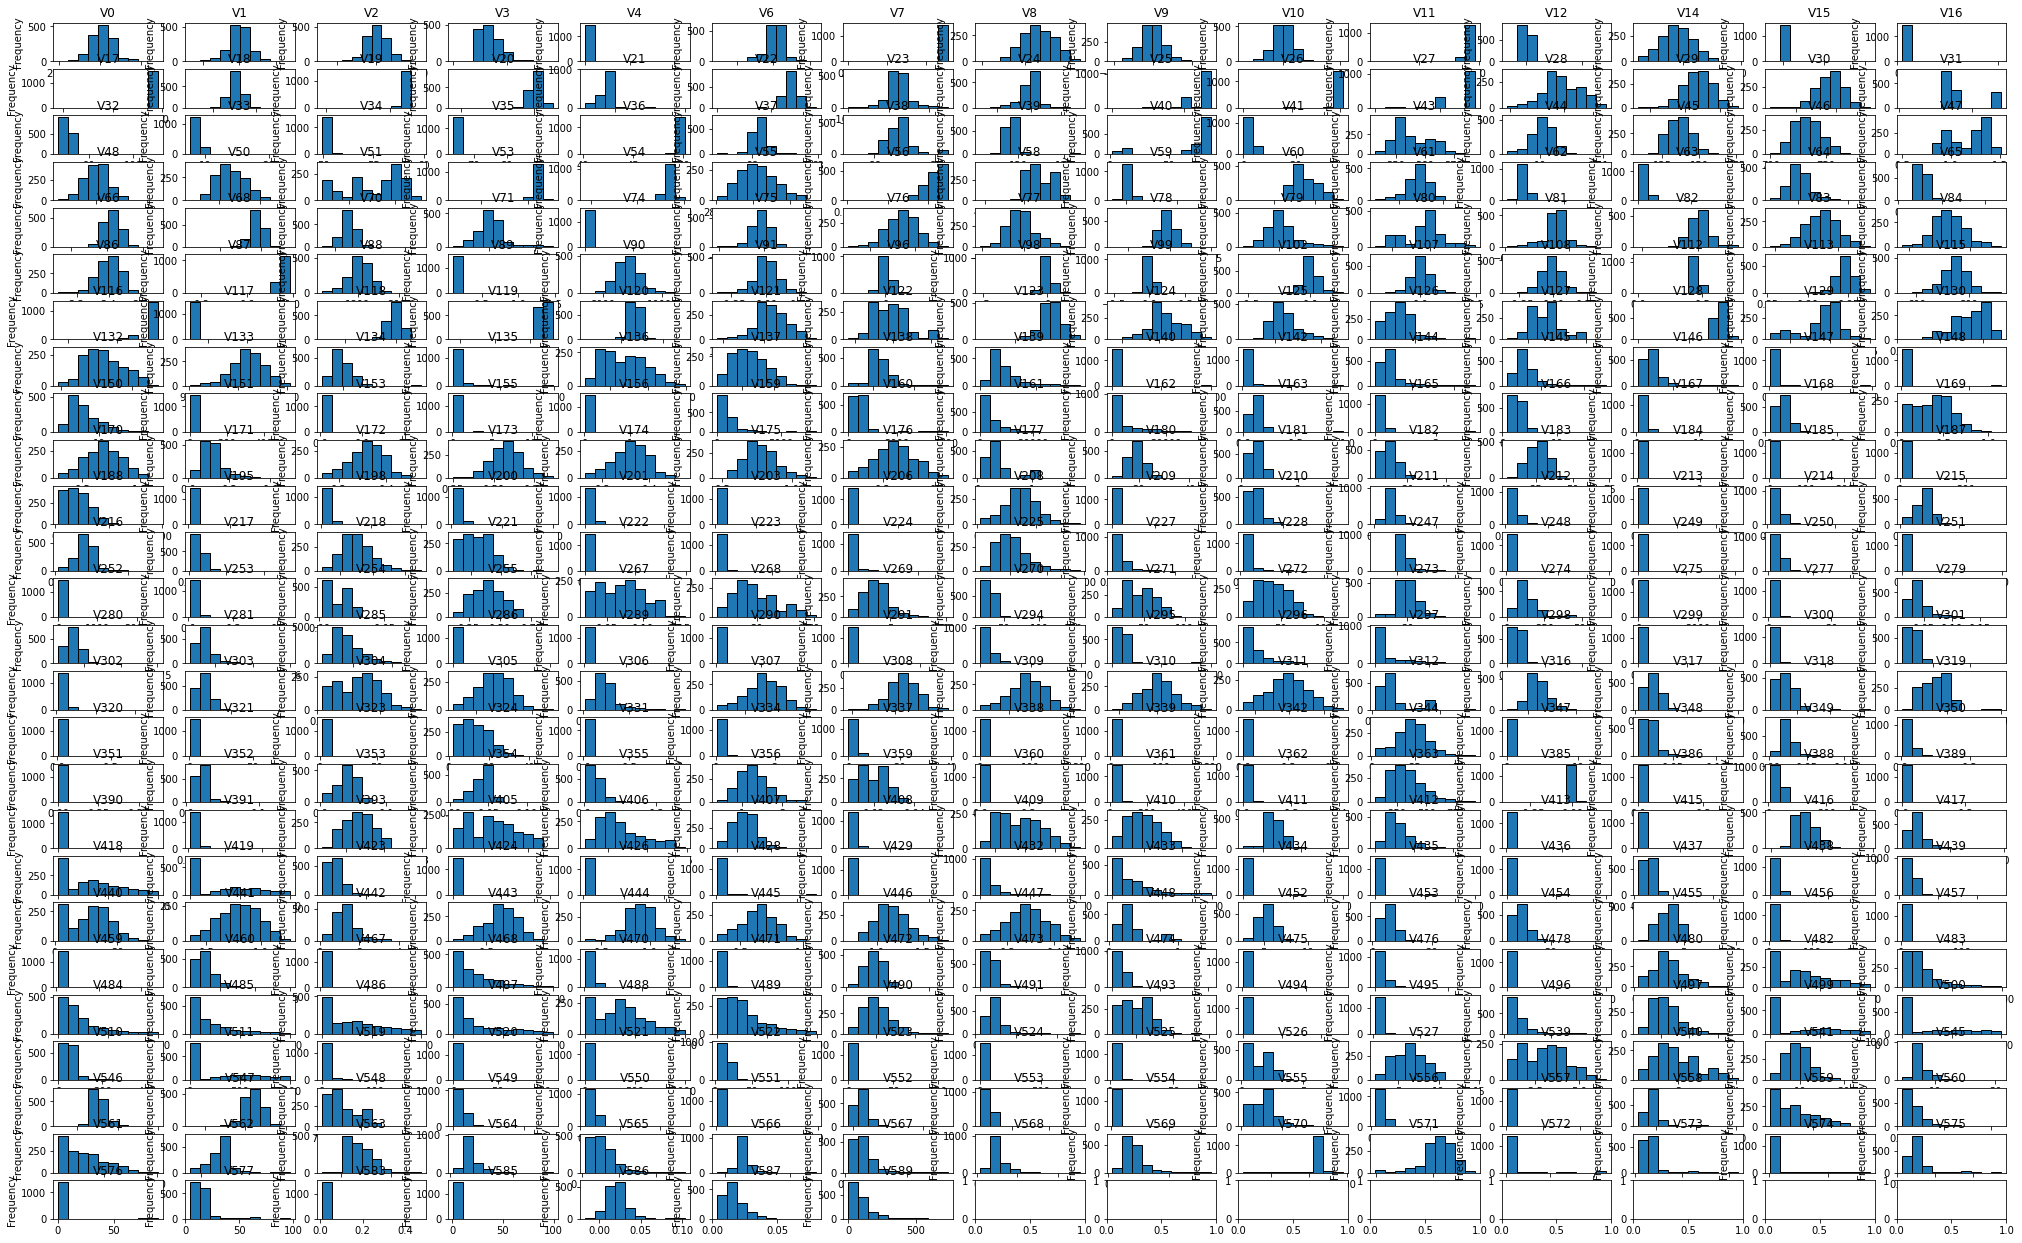

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(26,15)

fig.set_size_inches((35,22))
for var, subplot in zip(list_col,ax.flatten()):
  #sns.distplot(df_3.loc[df_3[df_3.columns[i]].notnull(), df_3.columns[i]])
  #df_3.loc[df_3[var].notnull().hist(edgecolor='black' ,ax=subplot)
  
  #Pass_df[var].hist(edgecolor='black',ax=subplot)
  Pass_df[var].plot(kind='hist',ax=subplot, title=var, edgecolor='black')

# fig, ax = plt.subplots(1,3, figsize=(14,6))
# for var, subplot in zip(['ownerChange','sido','instkind'], ax.flatten()):
#     final_data.groupby([var,'OC'])['OC'].count().unstack('OC').plot(kind='bar', ax=subplot)
#     fig.tight_layout()
#      plt.show()

'Fail'데이터들의 피쳐별 데이터 분포 확인

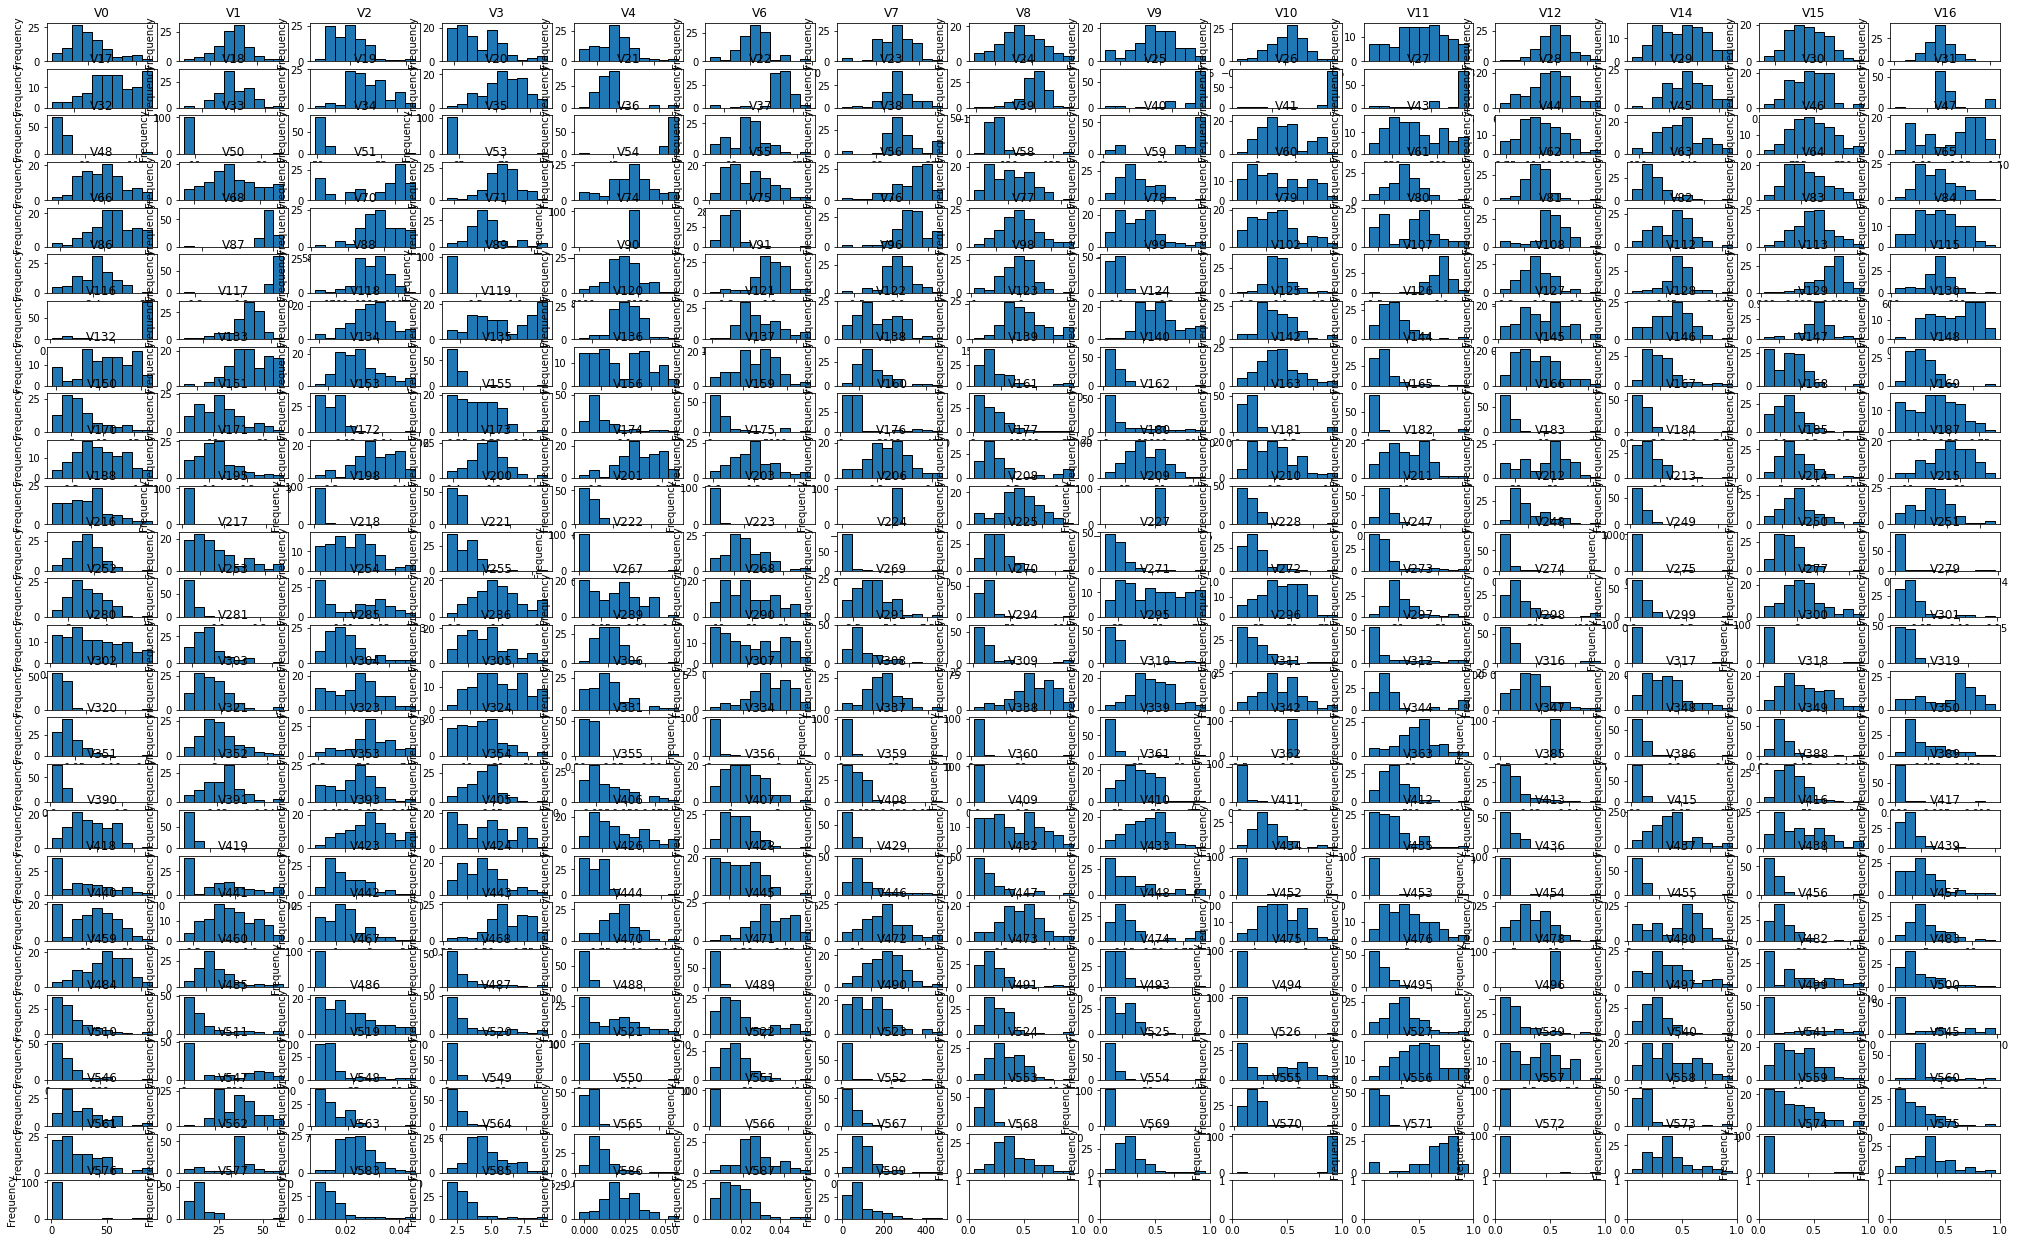

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(26,15)

fig.set_size_inches((35,22))
for var, subplot in zip(list_col,ax.flatten()):
  #sns.distplot(df_3.loc[df_3[df_3.columns[i]].notnull(), df_3.columns[i]])
  #df_3.loc[df_3[var].notnull().hist(edgecolor='black' ,ax=subplot)
  
  #Pass_df[var].hist(edgecolor='black',ax=subplot)
  Fail_df[var].plot(kind='hist',ax=subplot, title=var, edgecolor='black')

# fig, ax = plt.subplots(1,3, figsize=(14,6))
# for var, subplot in zip(['ownerChange','sido','instkind'], ax.flatten()):
#     final_data.groupby([var,'OC'])['OC'].count().unstack('OC').plot(kind='bar', ax=subplot)
#     fig.tight_layout()
#      plt.show()

임의로 'V7'피쳐 뽑아, 그 데이터의 분포를 확인. - 아웃라이어 확인

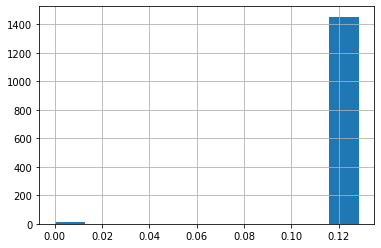

In [ ]:
Pass_df['V7'].hist()

boxplot을 통해 아웃라이어 확인

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


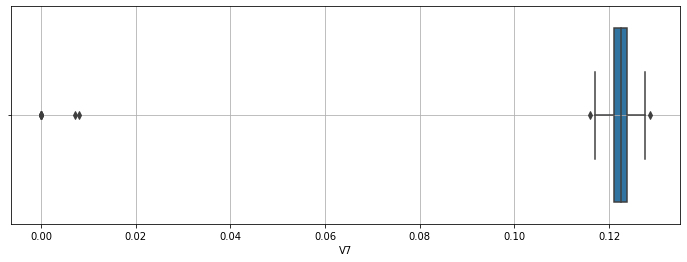

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,4))
sns.boxplot(Pass_df['V7'])
plt.grid()
plt.show()

weight를 2.0으로 둔 상태에서, 아웃라이어가 10개 있음을 확인

In [ ]:
a = Pass_df['V7']
weight = 2.0
quantile_25 = np.percentile(a.values, 25)
quantile_75 = np.percentile(a.values, 75)

iqr = quantile_75 - quantile_25
iqr_weight = iqr * weight
lowest_val = quantile_25 - iqr_weight
highest_val = quantile_75 + iqr_weight

outlier_index = list(a[(a<lowest_val)|(a>highest_val)].index)

len(outlier_index)

10

이번에는 임의로 'V31'피쳐 뽑아, 그 데이터의 분포를 확인. - 아웃라이어 확인

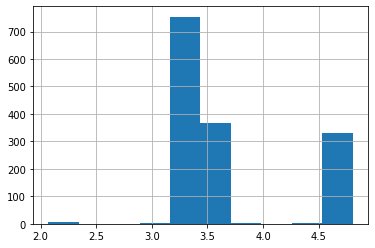

In [ ]:
Pass_df['V31'].hist()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


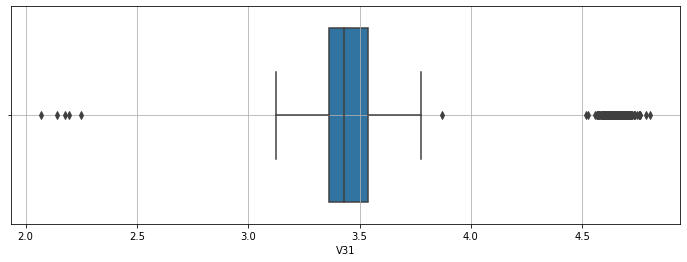

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
sns.boxplot(Pass_df['V31'])
plt.grid()
plt.show()

weight를 2.0으로 둔 상태에서, 아웃라이어가 339개 있음을 확인 : 전체 데이터 수의 15%이상 아웃라이어인 경우 <br> -> 함부로 아웃라이어를 지워서는 안됨. 제조데이터상 피쳐이름을 모르기 때문에 양 끝 값이 클래스를 결정하는 굉장히 유의미한 요소가 될 수 있음. 

In [ ]:
a = Pass_df['V31']
weight = 2.0
quantile_25 = np.percentile(a.values, 25)
quantile_75 = np.percentile(a.values, 75)

iqr = quantile_75 - quantile_25
iqr_weight = iqr * weight
lowest_val = quantile_25 - iqr_weight
highest_val = quantile_75 + iqr_weight

outlier_index = list(a[(a<lowest_val)|(a>highest_val)].index)

len(outlier_index)

339

###2.5.1이상치 보정


outlier_change() :함수 구현 - 개수가 15% 미만일 경우, 전부 아웃라이어를 lowerbound, upperbound값으로 대체


Pass data에 대해서 outlier를 15% 이상 가지고 있는 경우, 피쳐 
<br> 아웃라이어가 15%이상의 비율을 차지할 경우(=1463*0.15=219)

In [ ]:
Pass_df_copy = Pass_df.copy()

In [ ]:
total_cell_number = 0 # 총 대치시켜버리는 셀 수
pass_over15percent_result = [] # 아웃라이어의 개수가 20%이상 넘는 피쳐이름과 그 개수 담으려구 만든 리스트
pass_border_num = 219 #1463*0.15=219

In [ ]:
import numpy as np

def outlier_change(df, weight_val, over15_li, border_num):
  border_num = 0
  for i in range(0, len(list(df.columns))):

    a = df[list(df.columns)[i]]
    weight = weight_val
    quantile_25 = np.percentile(a.values, 25)
    quantile_75 = np.percentile(a.values, 75)

    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    outlier_index = list(a[(a<lowest_val)|(a>highest_val)].index)
    lowest_index = list(a[(a<lowest_val)].index)
    highest_index= list(a[(a>highest_val)].index)

    # 만약, 아웃라이어 값이 존재한다면
    if(len(outlier_index) != 0) : 

      # (코드 추가) 전체 아웃라이어 개수 셀단위로 몇 개인지 세어보기
      global total_cell_number # 전역변수 변경하는거라 앞에 global 반드시 붙여줘야함
      total_cell_number += len(outlier_index)

      # (코드 추가) 만약 아웃라이어가 15%이상의 비율을 차지할 경우 : border_num
      if(len(outlier_index) >=  border_num): 
          over15_li.append(list(df.columns)[i]) # 피쳐 이름추가
          over15_li.append(len(outlier_index))  # 이어서, 개수 추가

      for index in range(0, len(lowest_index)):
        df.loc[[lowest_index[index]],[list(df.columns)[i]]] = lowest_val

      for  index in range(0, len(highest_index)):
        df.loc[[ highest_index[index]],[list(df.columns)[i]]] =  highest_val



아웃라이어 대체됨.

In [ ]:
outlier_change(Pass_df,2.0,pass_over15percent_result,pass_border_num)

In [ ]:
# 아웃라이어가 15%이상(=1463*0.15=219)의 비율을 차지하느 경우의 피쳐이름과 그 개수 저장
pass_over15percent_result

['V31', 339, 'V562', 313]

In [ ]:
df_b = Pass_df_copy.loc[:,['V31', 'V562']] 
df_a = Pass_df.drop(['V31', 'V562'], axis=1)

In [ ]:
Pass_df = pd.concat([df_a,df_b], axis = 1) #'V31', 'V562'의 아웃라이어 대체하지 않음. 원본 보존

Fail data에 대해서 outlier를 15% 이상 가지고 있는 경우, 피쳐 

In [ ]:
total_cell_number = 0 # 총 대치시켜버리는 셀 수
fail_over15percent_result = [] # 아웃라이어의 개수가 20%이상 넘는 피쳐이름과 그 개수 담으려구 만든 리스트
fail_border_num = 15 # 104*0.15 = 15

아웃라이어 대체됨.

In [ ]:
outlier_change(Fail_df,2.0,fail_over15percent_result,fail_border_num)

In [ ]:
# 아웃라이어가 15%이상(=104*0.15 = 15)의 비율을 차지하느 경우의 피쳐이름 저장  - fail데이터는 없음.
fail_over15percent_result

[]

outlier_change() 적용이후, 안정화된 분포

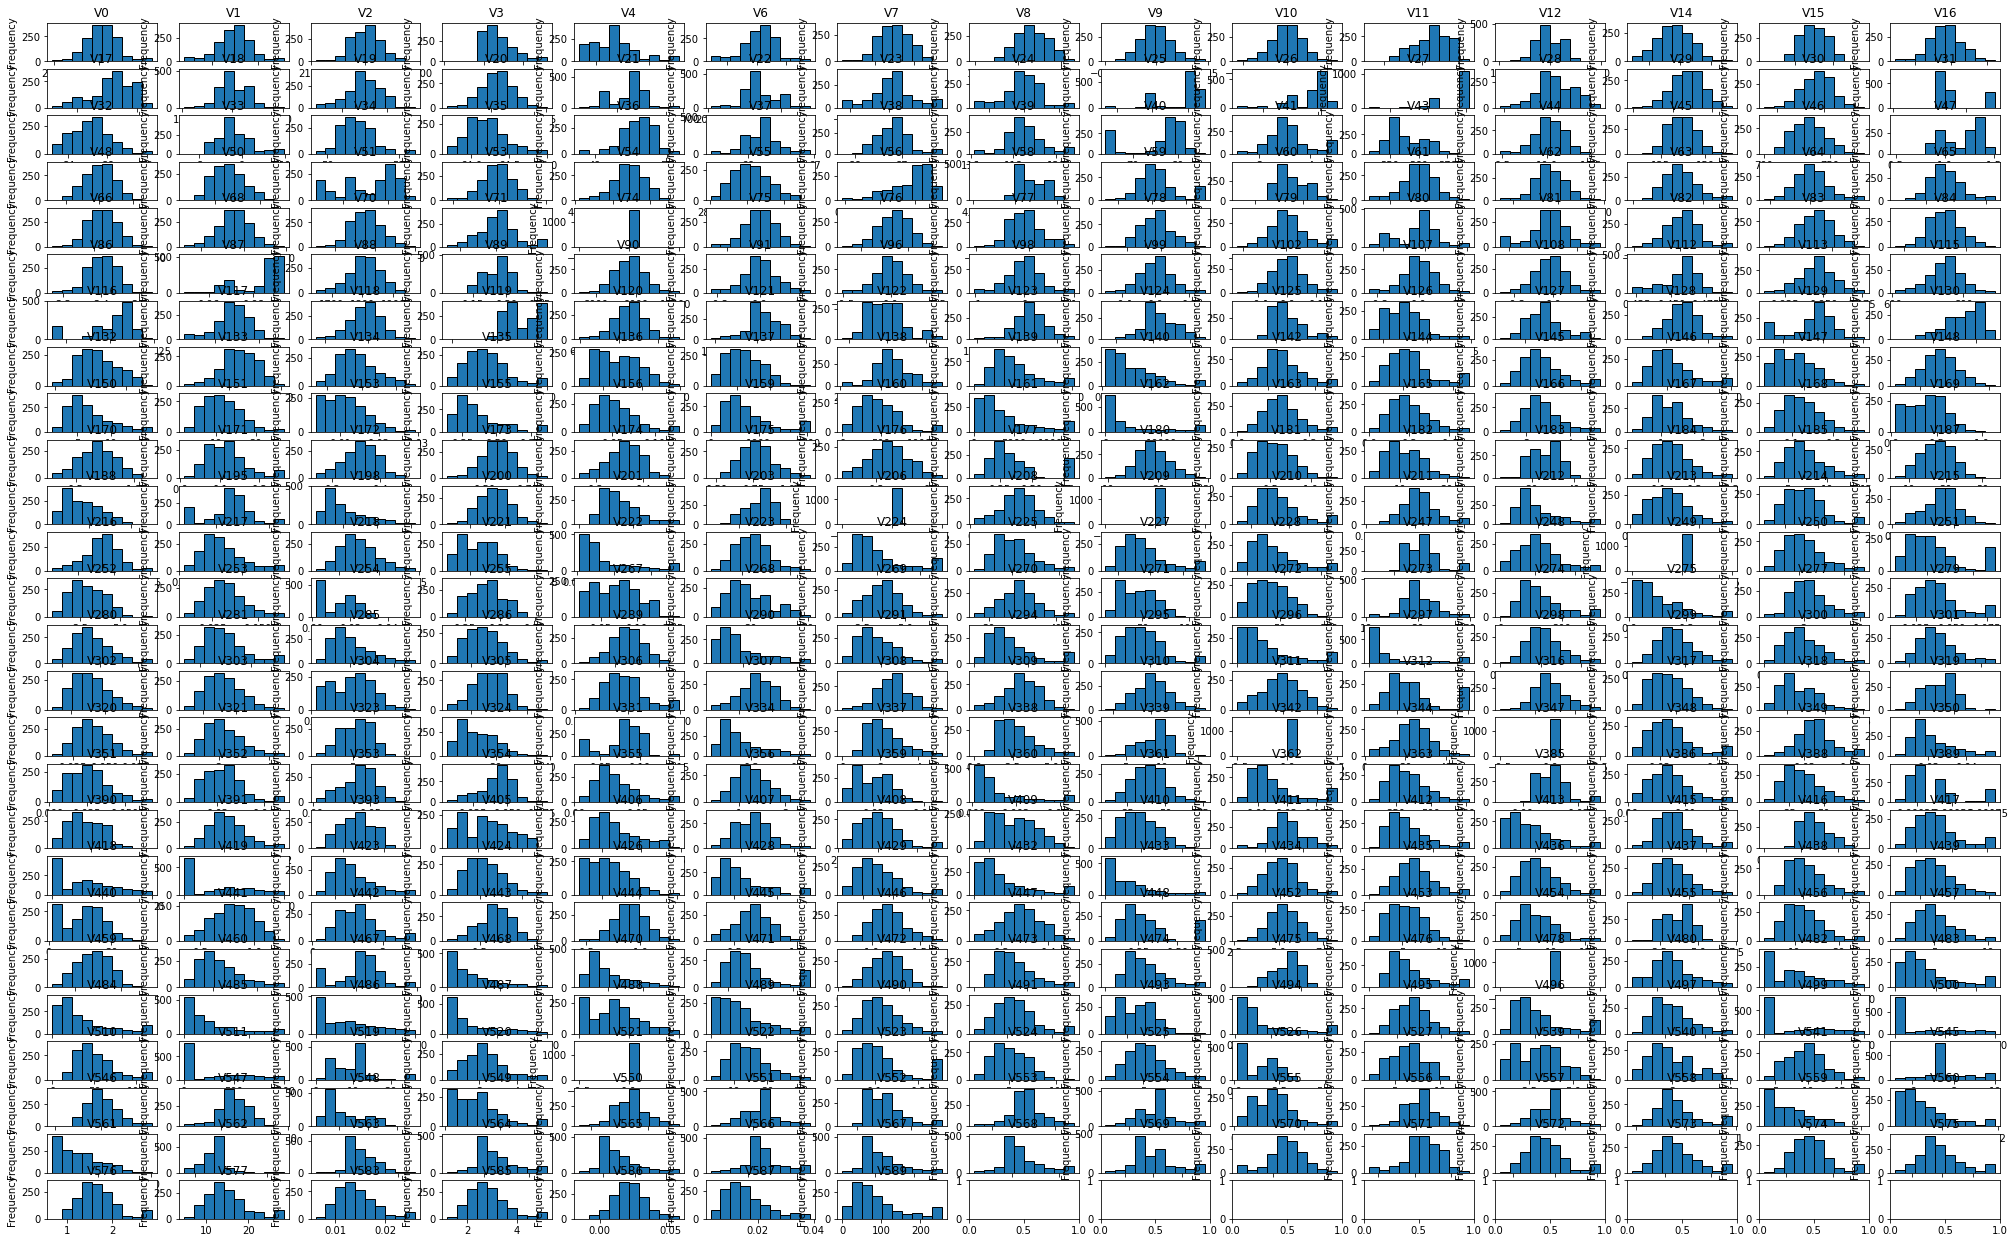

In [ ]:
#Pass
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(26,15)

fig.set_size_inches((35,22))
for var, subplot in zip(list_col,ax.flatten()):
  #Pass
  Pass_df[var].plot(kind='hist',ax=subplot, title=var, edgecolor='black')

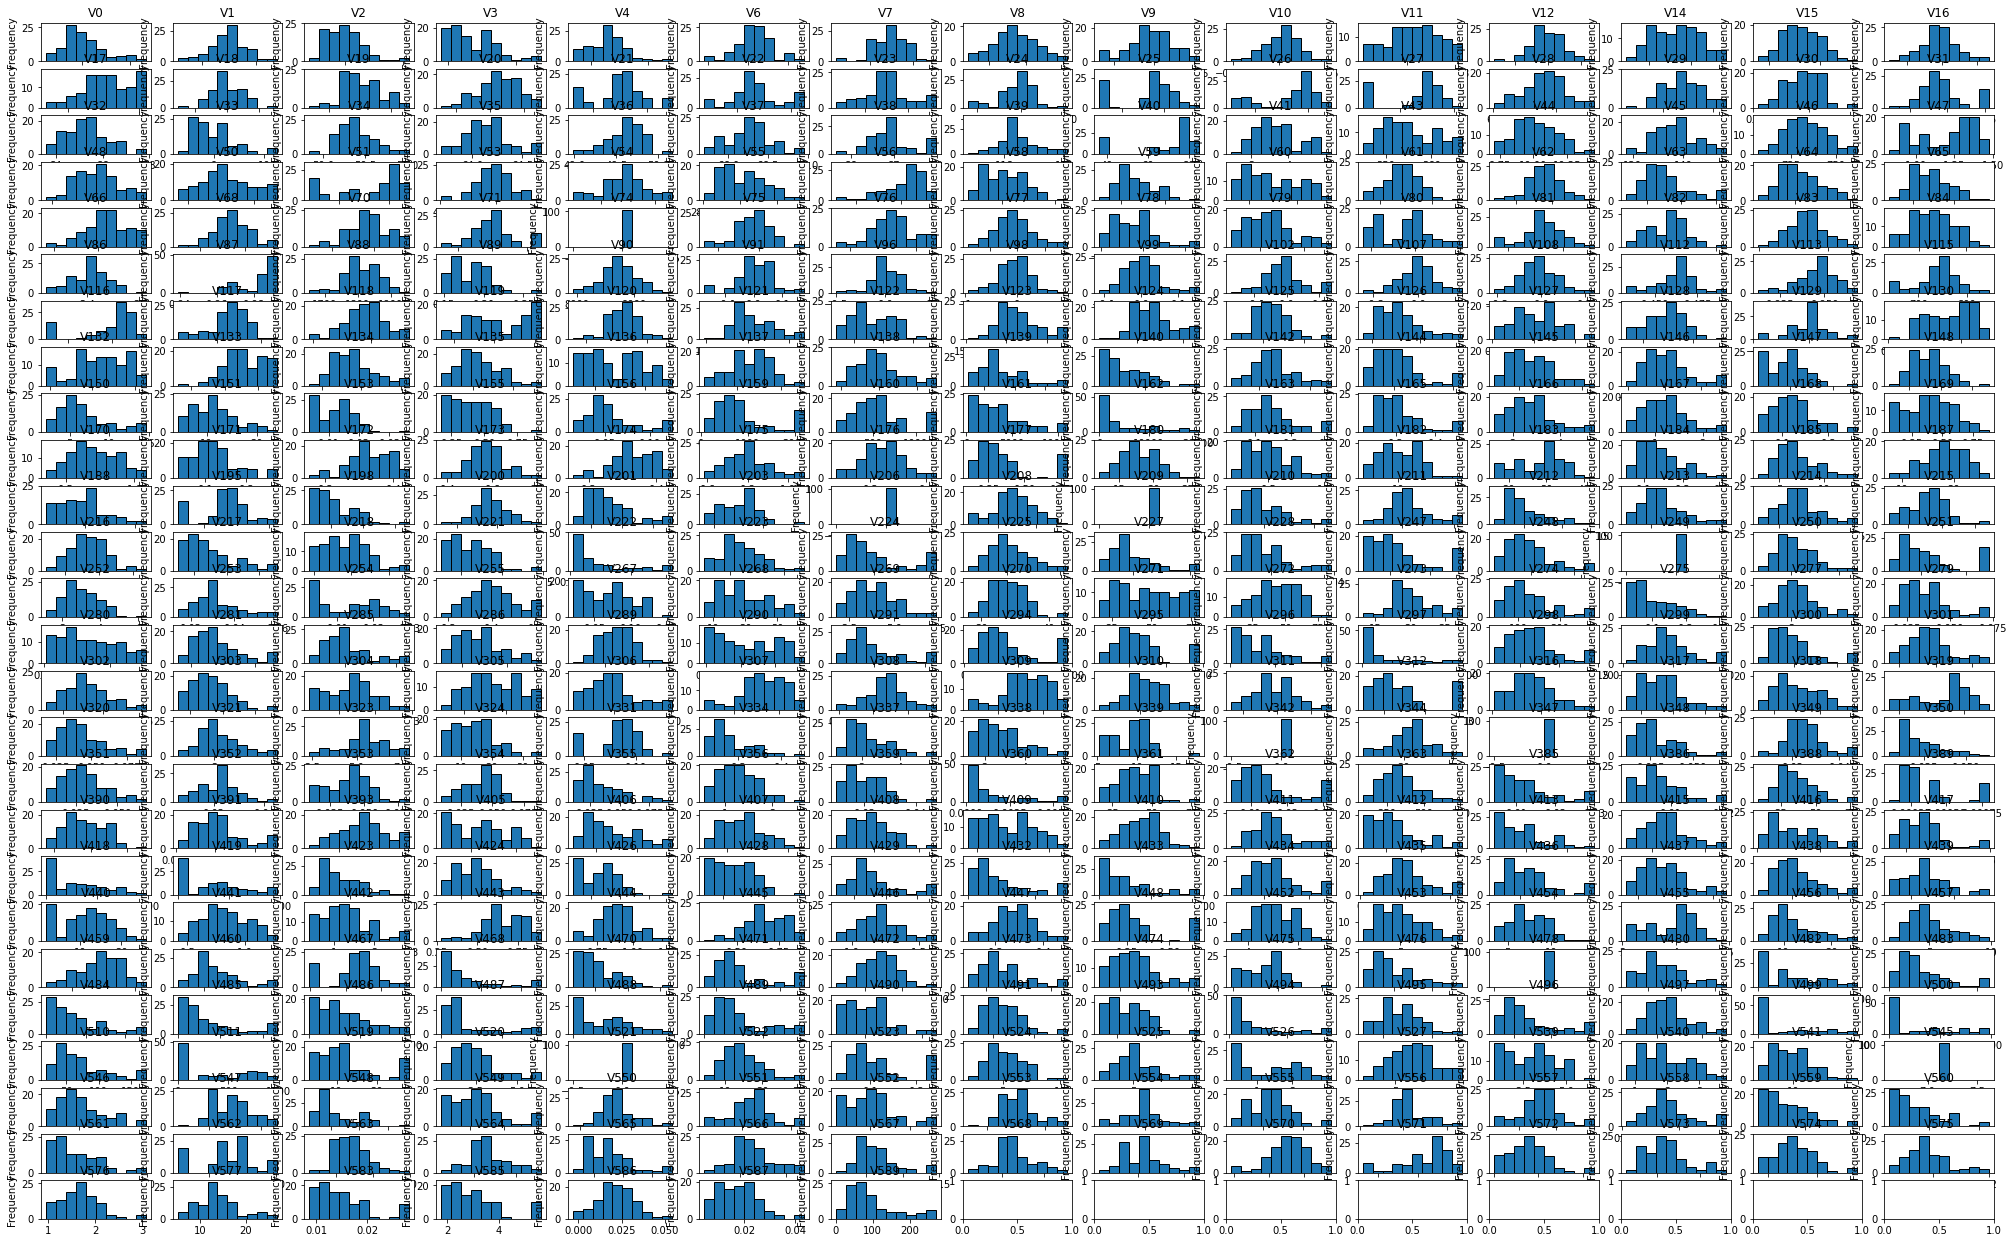

In [ ]:
#Fail
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(26,15)

fig.set_size_inches((35,22))
for var, subplot in zip(list_col,ax.flatten()):
  #Fail
  Fail_df[var].plot(kind='hist',ax=subplot, title=var, edgecolor='black')

In [ ]:
perfect_data = pd.concat([Pass_df,Fail_df], axis = 0)

In [ ]:
perfect_data

,Pass/Fail,V0,V1,V2,V3,V4,V6,V7,V8,V9,V10,V11,V12,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,...,V541,V545,V546,V547,V548,V549,V550,V551,V552,V553,V554,V555,V556,V557,V558,V559,V560,V561,V563,V564,V565,V566,V567,V568,V569,V570,V571,V572,V573,V574,V575,V576,V577,V583,V585,V586,V587,V589,V31,V562
0,-1.0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.613300,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.7500,751.00,0.895500,1.77300,3.049000,64.2333,2.0222,0.1632,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,63.9400,4.515,...,11.5074,7.116,1.0616,395.570,75.752,0.42340,12.930,0.78,0.1827,5.7349,0.336300,39.884200,3.26870,1.0297,1.034400,0.4385,0.1039,42.3877,0.710119,6.555577,0.150508,2.582453,0.063794,2.482190,21.452429,533.8500,2.11130,8.9500,0.3157,3.0624,0.1026,1.6765,14.9509,0.0118,2.36300,0.01995,0.014218,101.09755,3.519100,262.146575
1,-1.0,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.343300,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.7500,-1640.25,1.297300,2.01430,7.390000,68.4222,2.2667,0.2102,84.9052,9.7997,50.6596,64.2828,49.3404,65.4382,87.5241,118.1188,78.2500,2.773,...,9.5796,7.116,1.3526,408.798,74.640,0.71930,16.000,1.33,0.2829,7.1196,0.498900,53.183600,3.91390,1.7819,0.963400,0.1745,0.0375,18.1087,0.686619,6.441468,0.156844,2.572855,0.067468,2.456990,21.949789,535.0164,2.43350,5.9200,0.2653,2.0111,0.0772,1.1065,10.9003,0.0223,4.44470,0.00960,0.020100,208.20450,3.417100,263.624321
3,-1.0,2988.72,2479.90,2199.0333,909.7926,1.3204,104.236700,0.1217,1.4882,-0.0124,-0.0033,0.9629,201.8482,9.6052,422.2894,9.6924,0.9687,192.1557,12.4782,1.4011,-5468.25,2648.25,-4515.0000,-1657.25,1.313700,2.00380,7.314500,62.9333,2.6444,0.2071,84.9105,8.6789,50.5100,64.1125,49.4900,65.4382,86.6867,117.0442,76.9000,1.279,...,7.7754,7.116,1.1650,388.942,72.442,1.86005,25.505,2.17,0.6812,11.4583,0.886114,146.394777,6.36245,2.9958,1.092000,0.7288,0.1946,62.7572,0.651100,7.320000,0.163000,3.561100,0.067000,2.729000,25.036300,530.5682,2.02530,9.3300,0.1738,2.8971,0.0525,1.7585,8.5831,0.0103,2.05440,0.02020,0.014900,73.84320,3.381300,268.228000
4,-1.0,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.396700,0.1235,1.5031,-0.0031,-0.0072,0.9569,201.9424,10.5661,420.5925,10.3387,0.9735,191.6037,12.4735,1.3888,-5476.25,2635.25,-3987.5000,117.00,1.288700,1.99120,7.274800,62.8333,3.1556,0.2696,86.3269,8.7677,50.2480,64.1511,49.7520,66.1542,86.1468,120.8222,76.3900,2.209,...,9.4805,7.116,1.4636,399.914,79.156,1.03880,19.630,1.98,0.4287,9.7608,0.831100,70.970600,4.90860,2.5014,0.977800,0.2156,0.0461,22.0500,0.561094,6.202717,0.122485,2.482284,0.057536,2.328544,20.834779,532.0155,2.02750,8.8300,0.2224,3.1776,0.0706,1.6597,10.9698,0.0260,5.21645,0.02020,0.014900,73.84320,3.272800,262.663631
5,-1.0,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.396700,0.1235,1.5287,0.0167,0.0055,0.9699,200.4720,8.6617,414.2426,9.2441,0.9747,191.2280,12.4935,1.3836,-6058.00,2953.75,-3906.5000,193.75,0.893000,1.77750,3.050500,62.3778,1.6333,0.1394,85.4233,9.6484,50.5795,64.0720,49.4205,66.2949,87.0273,117.4928,63.9400,3.024,...,9.5796,7.116,1.2708,412.222,80.326,1.10500,16.060,1.65,0.5329,7.2448,0.626800,86.946300,3.89600,2.0541,0.946900,0.2900,0.0604,30.6277,0.844400,4.750000,0.190500,1.878400,0.074300,1.870000,22.559800,534.2091,2.32360,8.9100,0.3201,2.2598,0.0899,1.6679,13.7755,0.0189,3.82760,0.03420,0.015100,44.00770,3.520000,254.006000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,1.0,2988.39,2493.72,2206.4000,982.5452,1.1853,114.114275,0.1228,1.5279,-0.

In [ ]:
# 스케일링을 위한 처리
y = perfect_data['Pass/Fail']
X = perfect_data.iloc[:,1:]

In [ ]:
perfect_data.to_csv('perfect_data.csv', index=False) # df_4(1)(1)(1)로 저장될듯. 최종본.

##2.6스케일링

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer

MMS = MinMaxScaler()
SS = StandardScaler()
RS = RobustScaler()
NS = Normalizer()

MMS.fit(X)
SS.fit(X)
RS.fit(X)
NS.fit(X)

X_mms = MMS.transform(X) 
X_ss = SS.transform(X)
X_rs = RS.transform(X)
X_ns = NS.transform(X)

In [ ]:
X_mms_pd = pd.DataFrame(X_mms, columns=X.columns)
X_ss_pd = pd.DataFrame(X_ss, columns=X.columns)
X_rs_pd = pd.DataFrame(X_rs, columns=X.columns)
X_ns_pd = pd.DataFrame(X_ns, columns=X.columns)

In [ ]:
X1 = X_mms_pd
X2 = X_ss_pd
X3 = X_rs_pd
X4 = X_ns_pd

## 2.7Recursive Feature Elimination(RFE)의 피쳐 Rank를 통해 피쳐중요도 확인

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
rfe=RFE(model,1)
y = perfect_data['Pass/Fail'].values
X = X1

fit=rfe.fit(X,y)
print(fit.n_features_, fit.support_, fit.ranking_)

1 [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False 

In [ ]:
data_ran = pd.DataFrame(fit.ranking_)
data_ran.index = X.columns

In [ ]:
data_ran.columns = ['Value']
data_ran

,Value
V0,47
V1,355
V2,70
V3,316
V4,81
...,...
V586,262
V587,196
V589,52
V31,241


In [ ]:
data_ran.sort_values(by=['Value'], axis=0)

,Value
V59,1
V40,2
V247,3
V471,4
V23,5
...,...
V273,378
V389,379
V206,380
V274,381


중요도가 300등 이상인 것들은 제거.

In [ ]:
worst_index = data_ran[data_ran['Value'] >=300].index
worst = list(worst_index)

In [ ]:
for i in range(0, len(worst)):
  worst[i]=str(worst[i])

worst

['V1',
 'V3',
 'V6',
 'V7',
 'V21',
 'V22',
 'V24',
 'V34',
 'V39',
 'V43',
 'V44',
 'V53',
 'V56',
 'V74',
 'V76',
 'V90',
 'V91',
 'V96',
 'V98',
 'V108',
 'V126',
 'V128',
 'V133',
 'V134',
 'V135',
 'V139',
 'V140',
 'V142',
 'V161',
 'V167',
 'V169',
 'V172',
 'V174',
 'V176',
 'V180',
 'V195',
 'V198',
 'V201',
 'V206',
 'V209',
 'V249',
 'V250',
 'V251',
 'V255',
 'V273',
 'V274',
 'V280',
 'V286',
 'V296',
 'V302',
 'V304',
 'V307',
 'V310',
 'V334',
 'V342',
 'V347',
 'V389',
 'V393',
 'V408',
 'V415',
 'V416',
 'V419',
 'V428',
 'V432',
 'V443',
 'V444',
 'V445',
 'V447',
 'V448',
 'V452',
 'V467',
 'V468',
 'V473',
 'V478',
 'V482',
 'V484',
 'V521',
 'V522',
 'V547',
 'V549',
 'V552',
 'V570',
 'V562']

In [ ]:
df_best = perfect_data.drop(worst, axis = 1)

In [ ]:
df_best

,Pass/Fail,V0,V2,V4,V8,V9,V10,V11,V12,V14,V15,V16,V17,V18,V19,V20,V23,V25,V26,V27,V28,V29,V30,V32,V33,V35,V36,V37,V38,V40,V41,V45,V46,V47,V48,V50,V51,V54,V55,V58,...,V525,V526,V527,V539,V540,V541,V545,V546,V548,V550,V551,V553,V554,V555,V556,V557,V558,V559,V560,V561,V563,V564,V565,V566,V567,V568,V569,V571,V572,V573,V574,V575,V576,V577,V583,V585,V586,V587,V589,V31
0,-1.0,3030.93,2187.7333,1.3602,1.5005,0.0162,-0.0034,0.9455,202.4396,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-4043.7500,0.895500,1.77300,3.049000,64.2333,2.0222,0.1632,83.3971,9.5126,64.2588,49.3830,66.3141,86.9555,63.9400,4.515,130.3691,723.30920,1.3072,141.2282,624.31450,218.3174,4.841,2834.0,4.7057,...,3.1406,0.5064,6.6926,2.0570,4.0825,11.5074,7.116,1.0616,75.752,12.930,0.78,5.7349,0.336300,39.884200,3.26870,1.0297,1.034400,0.4385,0.1039,42.3877,0.710119,6.555577,0.150508,2.582453,0.063794,2.482190,21.452429,2.11130,8.9500,0.3157,3.0624,0.1026,1.6765,14.9509,0.0118,2.36300,0.01995,0.014218,101.09755,3.519100
1,-1.0,3095.78,2230.4222,0.8294,1.4966,-0.0005,-0.0148,0.9627,200.5470,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-3498.7500,1.297300,2.01430,7.390000,68.4222,2.2667,0.2102,84.9052,9.7997,64.2828,49.3404,65.4382,87.5241,78.2500,2.773,133.1727,724.82640,1.2887,145.8445,631.26180,205.1695,4.842,2853.0,4.6820,...,3.1310,0.8832,8.8370,1.7910,2.9799,9.5796,7.116,1.3526,74.640,16.000,1.33,7.1196,0.498900,53.183600,3.91390,1.7819,0.963400,0.1745,0.0375,18.1087,0.686619,6.441468,0.156844,2.572855,0.067468,2.456990,21.949789,2.43350,5.9200,0.2653,2.0111,0.0772,1.1065,10.9003,0.0223,4.44470,0.00960,0.020100,208.20450,3.417100
3,-1.0,2988.72,2199.0333,1.3204,1.4882,-0.0124,-0.0033,0.9629,201.8482,9.6052,422.2894,9.6924,0.9687,192.1557,12.4782,1.4011,-4515.0000,1.313700,2.00380,7.314500,62.9333,2.6444,0.2071,84.9105,8.6789,64.1125,49.4900,65.4382,86.6867,76.9000,1.279,131.8027,733.87780,1.3027,142.5427,637.37270,189.9079,4.748,2936.0,4.5873,...,6.7553,0.7404,6.4865,2.1565,3.2465,7.7754,7.116,1.1650,72.442,25.505,2.17,11.4583,0.886114,146.394777,6.36245,2.9958,1.092000,0.7288,0.1946,62.7572,0.651100,7.320000,0.163000,3.561100,0.067000,2.729000,25.036300,2.02530,9.3300,0.1738,2.8971,0.0525,1.7585,8.5831,0.0103,2.05440,0.02020,0.014900,73.84320,3.381300
4,-1.0,3032.24,2233.3667,1.5334,1.5031,-0.0031,-0.0072,0.9569,201.9424,10.5661,420.5925,10.3387,0.9735,191.6037,12.4735,1.3888,-3987.5000,1.288700,1.99120,7.274800,62.8333,3.1556,0.2696,86.3269,8.7677,64.1511,49.7520,66.1542,86.1468,76.3900,2.209,164.8292,775.44425,1.0341,138.0882,663.23395,233.5491,4.894,2865.0,4.6414,...,2.9954,2.2181,6.3745,2.0579,1.9999,9.4805,7.116,1.4636,79.156,19.630,1.98,9.7608,0.831100,70.970600,4.90860,2.5014,0.977800,0.2156,0.0461,22.0500,0.561094,6.202717,0.122485,2.482284,0.057536,2.328544,20.834779,2.02750,8.8300,0.2224,3.1776,0.0706,1.6597,10.9698,0.0260,5.21645,0.02020,0.014900,73.84320,3.272800
5,-1.0,2946.25,2233.3667,1.5334,1.5287,0.0167,0.0055,0.9699,200.4720,8.6617,414.2426,9.2441,0.9747,191.2280,12.4935,1.3836,-3906.5000,0.893000,1.77750,3.050500,62.3778,1.6333,0.1394,85.4233,9.6484,64.0720,49.4205,66.2949,87.0273,63.9400,3.024,142.2591,746.86920,1.1880,137.6473,640.19360,192.7702,4.915,2865.0,4.6275,...,4.4060,2.9077,7.0970,1.7910,2.9799,9.5796,7.116,1.2708,80.326,16.060,1.65,7.2448,0.626800,86.946300,3.89600,2.0541,0.946900,0.2900,0.0604,30.6277,0.844400,4.750000,0.190500,1.878400,0.074300,1.870000,22.559800,2.32360,8.9100,0.3201,2.2598,0.0899,1.6679,13.7755,0.0189,3.82760,0.03420,0.015100,44.00770,3.520000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,1.0,2988.39,2206.4000,1.1853,1.5279,-0.0094,0.0001,0.9672,199.9316,9.7716,423.2861,9.9888,0.9731,189.9429,12.4276,1.3931,-4544.

In [ ]:
df_best.to_csv('df_best_ms.csv', index=False) ################################### 최종 데이터셋을 df_best_ms로 저장했고 코드 내에서는 df_best로 사용하였습니다. ###############################################

In [ ]:
####df_best = pd.read_csv('./df_best_ms.csv')                            이거 사용하시면 됩니다.

In [ ]:
y = df_best['Pass/Fail']
X1 = df_best.iloc[:,1:]

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.metrics import f1_score, precision_recall_curve, roc_curve, make_scorer

##2.8 oversampling + train_test 분리

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y,test_size = 0.2, random_state = 42, stratify = y)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='auto', kind='regular')
X1_train_over,y1_train_over = smote.fit_sample(X1_train,y1_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X1_train.shape, y1_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X1_train_over.shape, y1_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y1_train_over).value_counts())

#3.모델링

##3.1 하이퍼파라미터튜닝+검증 -gridSerachCV()

In [ ]:
!pip install -q xgboost==0.4a30

import xgboost

     |████████████████████████████████| 757kB 5.5MB/s 


In [ ]:
import numpy as np
X1_train_over = np.array(X1_train_over)
X1_test = np.array(X1_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
dt_clf = DecisionTreeClassifier(random_state=42)
params = {
    'max_depth' : [8, 10, 12, 14, 16, 18],
    'min_samples_split' : [3, 4, 5, 6]
}

grid_cv_1 = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=skfold, verbose=1)
grid_cv_1.fit(X1_train_over, y1_train_over)
print('GridSearchCV 최고 평균 정확도 수치: {:.4f}'.format(grid_cv_1.best_score_))
print('GridSearchCV 최적 하이퍼파라미터: ', grid_cv_1.best_params_)
model = grid_cv_1.best_estimator_
score = model.score(X1_test, y1_test)
print('테스트세트에서의 정확도 수치: {:.4f}'.format(score))

scores_df = pd.DataFrame(grid_cv_1.cv_results_)
scores_df[['rank_test_score', 'params', 'mean_test_score',  'split0_test_score', 
           'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']]

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  2.3min finished


GridSearchCV 최고 평균 정확도 수치: 0.9684
GridSearchCV 최적 하이퍼파라미터:  {'max_depth': 16, 'min_samples_split': 6}
테스트세트에서의 정확도 수치: 0.9363


,rank_test_score,params,mean_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
0,23,"{'max_depth': 8, 'min_samples_split': 3}",0.938889,0.918803,0.940171,0.944444,0.952991,0.923077
1,23,"{'max_depth': 8, 'min_samples_split': 4}",0.938889,0.918803,0.940171,0.944444,0.952991,0.923077
2,21,"{'max_depth': 8, 'min_samples_split': 5}",0.940171,0.918803,0.940171,0.944444,0.952991,0.923077
3,21,"{'max_depth': 8, 'min_samples_split': 6}",0.940171,0.918803,0.940171,0.944444,0.952991,0.923077
4,19,"{'max_depth': 10, 'min_samples_split': 3}",0.948718,0.923077,0.948718,0.970085,0.952991,0.957265
5,19,"{'max_depth': 10, 'min_samples_split': 4}",0.948718,0.923077,0.948718,0.970085,0.952991,0.957265
6,17,"{'max_depth': 10, 'min_samples_split': 5}",0.953846,0.931624,0.948718,0.978632,0.952991,0.957265
7,17,"{'max_depth': 10, 'min_samples_split': 6}",0.953846,0.931624,0.948718,0.978632,0.952991,0.957265
8,15,"{'max_depth': 12, 'min_samples_split': 3}",0.957692,0.931624,0.961538,0.982906,0.957265,0.961538
9,15,"{'max_depth': 12, 'min_samples_split': 4}",0.957692,0.931624,0.961538,0.982906,0.957265,0.961538


In [ ]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from sklearn.model_selection import StratifiedKFold

lr_clf = LogisticRegression(random_state=42)
params = {'C' : [0.1, 0.5, 1, 3]}
skfold = StratifiedKFold(n_splits = 10)
grid_cv = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=skfold, verbose=1)
grid_cv.fit(X1_train_over, y1_train_over)
print('GridSearchCV 최고 평균 정확도 수치: {:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼파라미터: ', grid_cv.best_params_)
model = grid_cv.best_estimator_
score = model.score(X1_test, y1_test)
print('테스트세트에서의 정확도 수치: {:.4f}'.format(score))
print("테스트 세트 AUC: {:.4f}".format(roc_auc_score(y1_test, grid_cv.decision_function(X1_test))))

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
 

GridSearchCV 최고 평균 정확도 수치: 0.7338
GridSearchCV 최적 하이퍼파라미터:  {'C': 1}
테스트세트에서의 정확도 수치: 0.6911
테스트 세트 AUC: 0.4973


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    6.2s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

In [ ]:
params = {}
params['learning_rate'] = np.linspace(0.1,1,10)
params['max_feature'] = range(1,4)
params['n_estimators'] = range(5,50,10)
params['max_depth'] = range(3,5)
params['num_leaves'] = range(30, 70, 10)
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier()
grid_cv = GridSearchCV(lgbm_clf, param_grid=params, scoring='accuracy', cv=5, n_jobs = -1, verbose=1)
grid_cv.fit(X1_train_over, y1_train_over)
print('GridSearchCV 최고 평균 정확도 수치: {:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼파라미터: ', grid_cv.best_params_)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 26.8min
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed: 33.3min
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed: 40.3min finished


GridSearchCV 최고 평균 정확도 수치: 0.9932
GridSearchCV 최적 하이퍼파라미터:  {'learning_rate': 0.8, 'max_depth': 4, 'max_feature': 1, 'n_estimators': 45, 'num_leaves': 30}


In [ ]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from sklearn.model_selection import StratifiedKFold
import sklearn.svm as svm

lr_clf = svm.SVC(random_state=42)
params = {'C' : range(50,300,10), 'gamma' : [0.01, 0.1, 1, 10]}
skfold = StratifiedKFold(n_splits = 10)
grid_cv = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=skfold, verbose=1)
grid_cv.fit(X1_train_over, y1_train_over)
print('GridSearchCV 최고 평균 정확도 수치: {:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼파라미터: ', grid_cv.best_params_)
model = grid_cv.best_estimator_
score = model.score(X1_test, y1_test)
print('테스트세트에서의 정확도 수치: {:.4f}'.format(score))
print("테스트 세트 AUC: {:.4f}".format(roc_auc_score(y1_test, grid_cv.decision_function(X1_test))))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed: 38.8min finished


GridSearchCV 최고 평균 정확도 수치: 0.5611
GridSearchCV 최적 하이퍼파라미터:  {'C': 50, 'gamma': 0.01}
테스트세트에서의 정확도 수치: 0.9331
테스트 세트 AUC: 0.5000


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
xgb_parameters = {'n_estimators':[120, 150, 170], 'learning_rate':[0.07, 0.1,0.15], 'max_depth':[2, 3, 4]}
xgb_grid = GridSearchCV(xgb, param_grid=xgb_parameters,scoring=make_scorer(recall_score),  cv=3, refit=True)
xgb_grid.fit(X1_train_over, y1_train_over)
print('최적 하이퍼 파라미터: ', xgb_grid.best_params_)
print('최고 예측 정확도: {:.4f}'.format(xgb_grid.best_score_))

최적 하이퍼 파라미터:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 120}
최고 예측 정확도: 1.0000


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [130, 150, 170],
           'max_depth' : [15, 16, 17],
           'min_samples_leaf' : [4, 8],
           'min_samples_split' : [15, 20, 25]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 42, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X1_train_over, y1_train_over)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

model = grid_cv.best_estimator_
score = model.score(X1_test, y1_test)
print('테스트세트에서의 정확도 수치: {:.4f}'.format(score)) 16, 4, 20, 150

최적 하이퍼 파라미터:  {'max_depth': 17, 'min_samples_leaf': 4, 'min_samples_split': 15, 'n_estimators': 150}
최고 예측 정확도: 0.9863
테스트세트에서의 정확도 수치: 0.9427


## 3.2 random_state from 1 to 100

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import sklearn.svm as svm
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


사용한 모델은 
- LogisticRegression <br>
    lr_clf = LogisticRegression(C=1, random_state =42, solver='liblinear') # C 
        
- DecisionTreeClassifier  <br>
    dt_clf = DecisionTreeClassifier(random_state=42, max_depth=16, min_samples_split=6)

- LightGBM  <br>
    lgbm_clf = LGBMClassifier(n_estimators=45, num_leaves=30, max_depth = 4, max_feature = 1, leaning_rate = 0.8, n_jobs=-1, boost_from_average=False) 

-  RandomForest  <br>
    rf_clf = RandomForestClassifier(random_state=42, max_depth=16, min_samples_leaf=4, min_samples_split=20, n_estimators=150)

-  XGBoost  <br>
    xgb_clf = XGBClassifier(random_state=42, n_estimators=120, learning_rate=0.1, max_depth = 3)

- SVM  <br>
    l_svm_clf = svm.SVC(C=10, gamma=0.01, kernel = 'linear')

형평성을 위한, train_test_split의 random_state 1~100까지의 결과치중 최고의 성능을 뽑고 성능을 뽑고 이것들의 평균값을 취해 최종 성능을 평가하였음. <br>
최종 성능 : 0.86809

In [ ]:
def get_auc(models, X_train, y_train, X_test, y_test, empty_list):

    for i in range(0,len(models)):
      model.fit(X_train, y_train)
      pred = model.predict(X_test)
      auc=roc_auc_score(y_test, pred)

      empty_list.append(auc)

    return max(empty_list)



def For_Random_State(n,best_list,X, y):

  for i in range(0,n):
    empty_list = []
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = i+1, stratify = y)

    smote = SMOTE(ratio='auto', kind='regular')
    X_train_over,y_train_over = smote.fit_sample(X_train,y_train)
    #print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X1_train.shape, y1_train.shape)
    #print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X1_train_over.shape, y1_train_over.shape)
    #print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y1_train_over).value_counts())

    ####### 로지스틱
    lr_clf = LogisticRegression(C=1, random_state =42, solver='liblinear') # C 
        
    ####### 결정 나무
    dt_clf = DecisionTreeClassifier(random_state=42, max_depth=16, min_samples_split=6)

    ####### LightGBM
    lgbm_clf = LGBMClassifier(n_estimators=45, num_leaves=30, max_depth = 4, max_feature = 1, leaning_rate = 0.8, n_jobs=-1, boost_from_average=False) 

    ####### RandomForest
    rf_clf = RandomForestClassifier(random_state=42, max_depth=16, min_samples_leaf=4, min_samples_split=20, n_estimators=150)

    ####### XGB
    xgb_clf = XGBClassifier(random_state=42, n_estimators=120, learning_rate=0.1, max_depth = 3)

    ####### SVM
    l_svm_clf = svm.SVC(C=10, gamma=0.01, kernel = 'linear')

    models = ['lr_clf','dt_clf','lgbm_clf', 'rf_clf', 'xgb_clf', 'l_svm_clf']
    best_list.append(get_auc(models,X_train, y_train, X_test, y_test, empty_list))
  

  return sum(best_list)


######실행#######
best_list = []
For_Random_State(100,best_list,X1,y) / 100

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

0.8680952380952376